<h1> Clustering

# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Percorso del dataset
file_path = "/content/drive/MyDrive/Progetti data science/Progetto Python/Clustering/songs_spotify.csv"

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sb

from scipy.stats import skewnorm
from matplotlib import style
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib import rcParams
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering,KMeans,Birch,MiniBatchKMeans,DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from plotly import tools
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
%matplotlib inline

# ETL

In [3]:
df = pd.read_csv(file_path, low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [4]:
df.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

<h3>Conteggio dei valori nulli

In [5]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

<h3> Conteggio dei valori duplicati

In [6]:
check = df.duplicated()
Counter(check)

Counter({False: 42305})

<h3>Drop delle colonne</h3>

In [7]:
df = df.drop(columns = ["type", "id", "uri", "track_href", "analysis_url", "song_name","Unnamed: 0", "title", "mode"])

<h3>Lista dei valori che assume la colonna del genere</h3>

In [8]:
df["genre"].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

# Analisi esplorativa dei dati

In [9]:
cmap = cm.get_cmap('gnuplot')

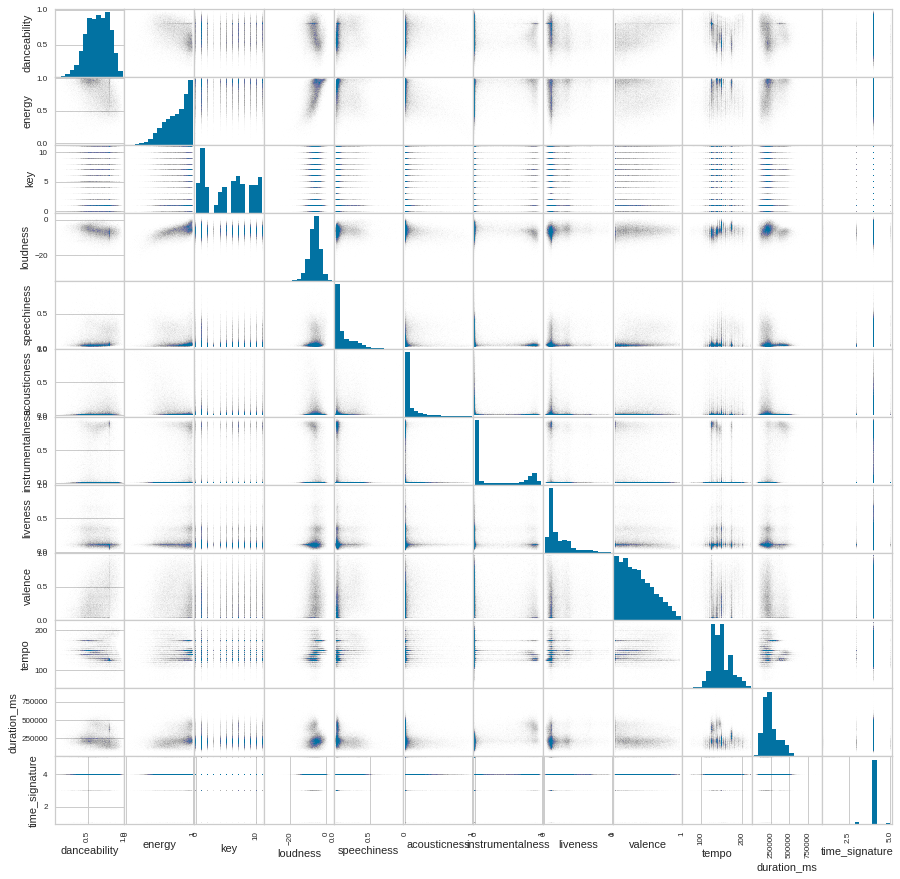

In [ ]:
scatter = pd.plotting.scatter_matrix(df, marker = 'o', s=0.01, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

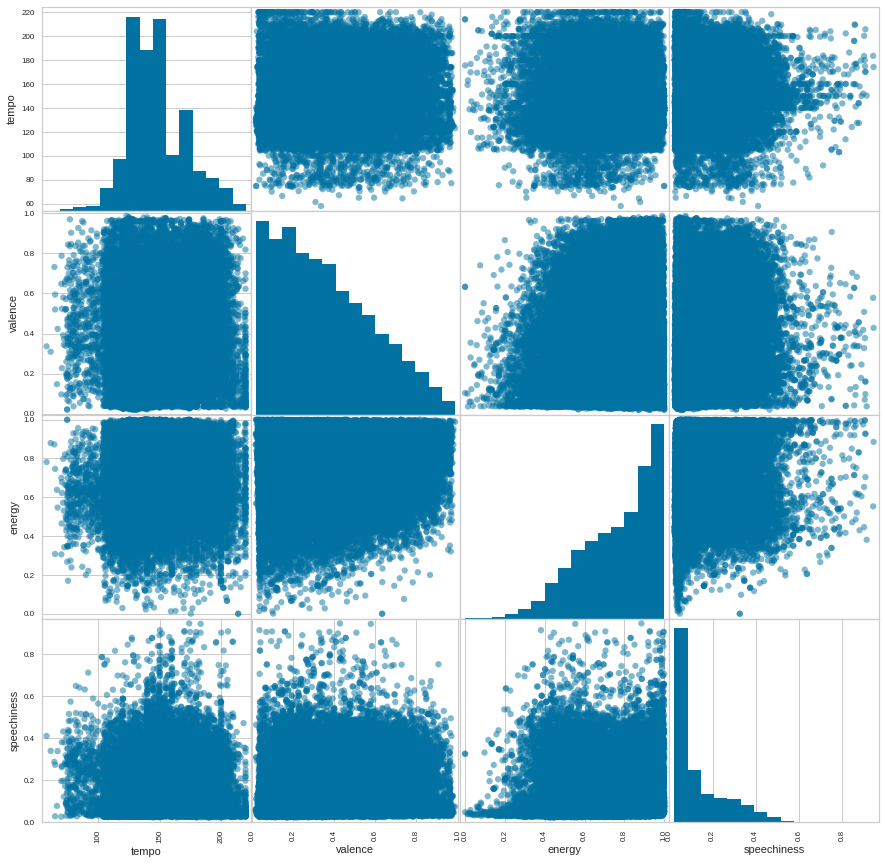

In [ ]:
aud = ['tempo', 'valence', 'energy', 'speechiness']
x_aud = df[aud]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_aud, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

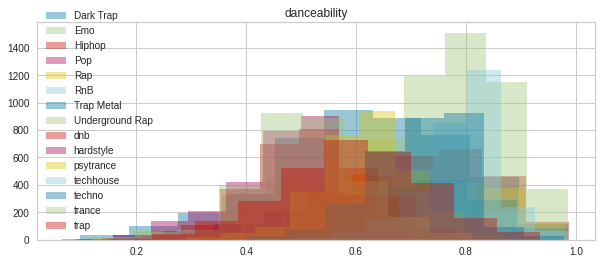

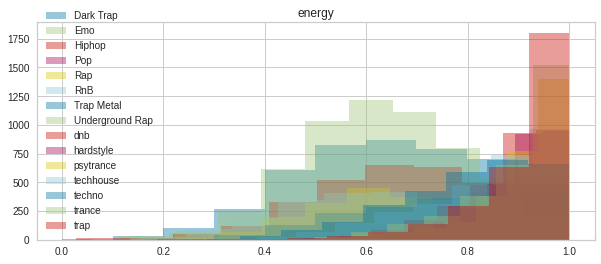

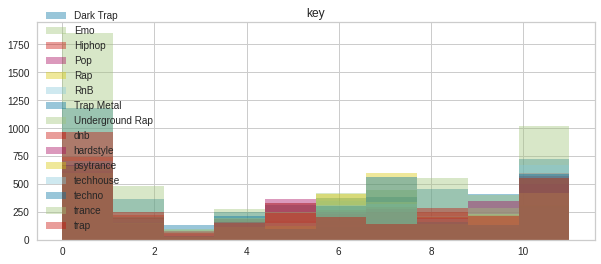

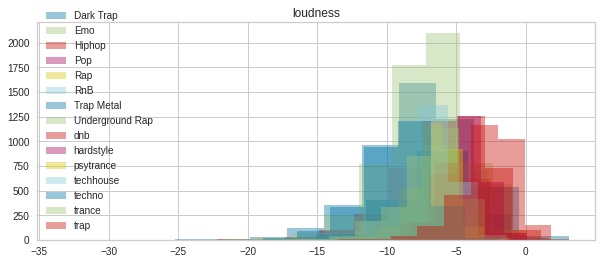

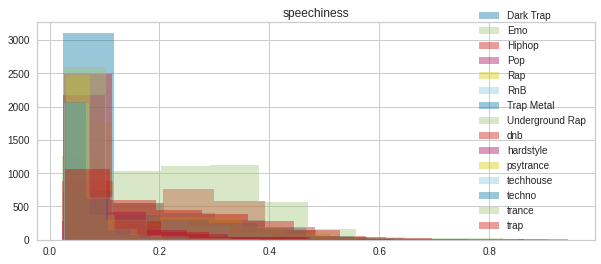

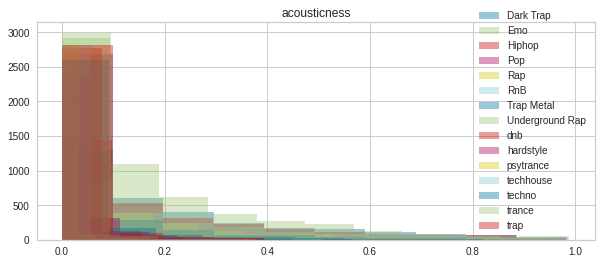

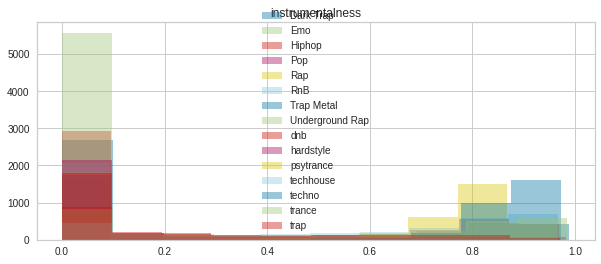

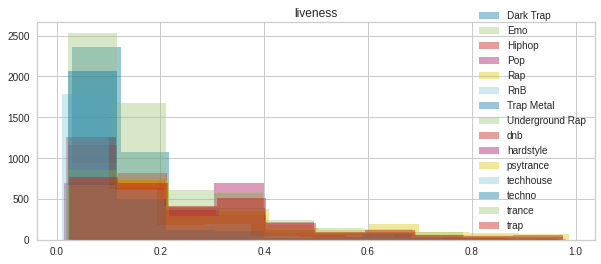

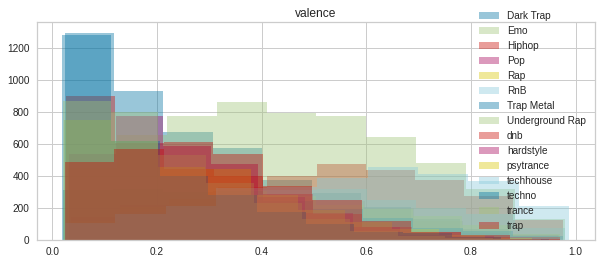

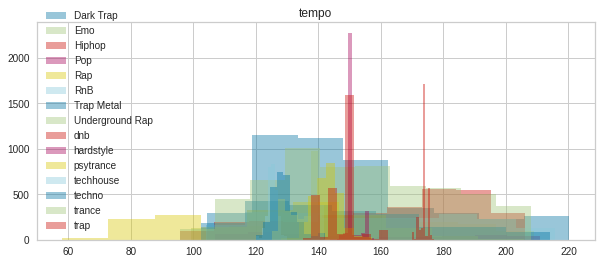

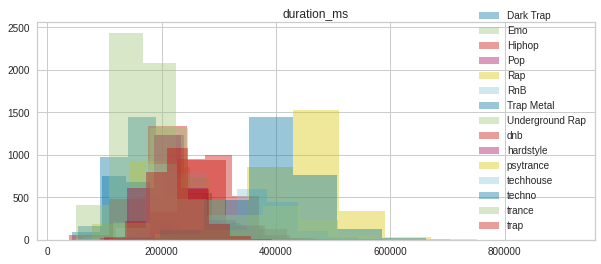

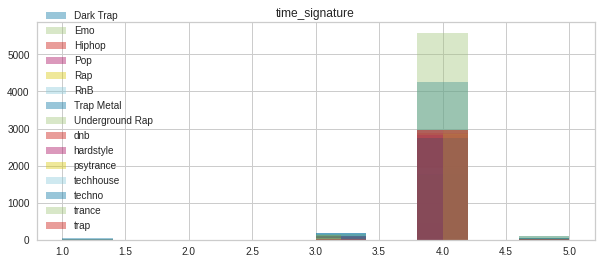

In [ ]:
# Distribuzioni delle feature raggruppate in base al genere
numeric = df._get_numeric_data()
grouped_genre = df.groupby('genre')

for col in numeric.columns:
    fig,ax = plt.subplots()
    
    for i, d in grouped_genre:
        d[col].hist(alpha = 0.4, ax = ax, label = i, figsize = (10,4))
        ax.set_title(col)

    ax.legend()
    plt.show()

In [ ]:
grouped_genre.mean()

danceability    energy       key  loudness  speechiness  \
genre                                                                      
Dark Trap            0.618834  0.646851  5.298384 -7.998401     0.123434   
Emo                  0.493699  0.761175  5.052976 -5.433641     0.080325   
Hiphop               0.698982  0.654418  5.553170 -7.014983     0.217150   
Pop                  0.676807  0.697638  5.399132 -5.632072     0.088363   
Rap                  0.742877  0.620083  5.048701 -6.887086     0.217862   
RnB                  0.674206  0.598884  5.021915 -6.899896     0.143110   
Trap Metal           0.647564  0.749157  4.663088 -5.879087     0.209677   
Underground Rap      0.744658  0.635776  5.059064 -7.362036     0.224992   
dnb                  0.520944  0.873433  5.619016 -4.063237     0.083478   
hardstyle            0.478027  0.896238  5.710831 -4.349444     0.094624   
psytrance            0.617462  0.902392  5.989531 -6.703383     0.060425   
techhouse            0.786794  0.834481  5.794622 -7.054302     0.072255   
techno               0.715742  0.795714  5.698917 -9.290230     0.066170   
trance               0.507724  0.892435  5.389797 -6.907600     0.071306   
trap                 0.593180  0.906060  5.024439 -2.725578     0.205966   

                 acousticness  instrumentalness  liveness   valence  \
genre                                                                 
Dark Trap            0.159493          0.277276  0.185081  0.273663   
Emo                  0.143094          0.011402  0.195243  0.444145   
Hiphop               0.195569          0.017154  0.210581  0.523628   
Pop                  0.149251          0.013831  0.177949  0.550264   
Rap                  0.170566          0.006939  0.181320  0.440921   
RnB                  0.225276          0.007400  0.178984  0.493974   
Trap Metal           0.114926          0.057051  0.243655  0.348786   
Underground Rap      0.162708          0.025280  0.191116  0.444629   
dnb                  0.019543          0.459998  0.202883  0.253062   
hardstyle            0.040841          0.137431  0.273830  0.267171   
psytrance            0.006333          0.766458  0.293434  0.259625   
techhouse            0.014223          0.580083  0.141387  0.568175   
techno               0.039556          0.847089  0.149137  0.192331   
trance               0.012970          0.495374  0.296976  0.220285   
trap                 0.024439          0.196289  0.276127  0.301178   

                      tempo    duration_ms  time_signature  
genre                                                       
Dark Trap        149.791186  187707.330275        3.961337  
Emo              153.888640  218317.432143        3.938690  
Hiphop           162.980479  227954.272787        3.975561  
Pop              152.098937  211392.828633        3.984816  
Rap              126.006374  203007.674784        3.985931  
RnB              157.533793  226402.473559        3.960934  
Trap Metal       148.684947  147195.234151        3.953476  
Underground Rap  152.914521  176152.595234        3.979915  
dnb              173.849166  286548.825017        3.998314  
hardstyle        150.659340  229493.391349        3.964237  
psytrance        142.688529  445575.322864        3.961499  
techhouse        124.927316  291691.778151        3.993277  
techno           128.971052  399263.969553        3.945873  
trance           134.625598  287512.124708        3.985995  
trap             147.691379  225174.448945        3.987948

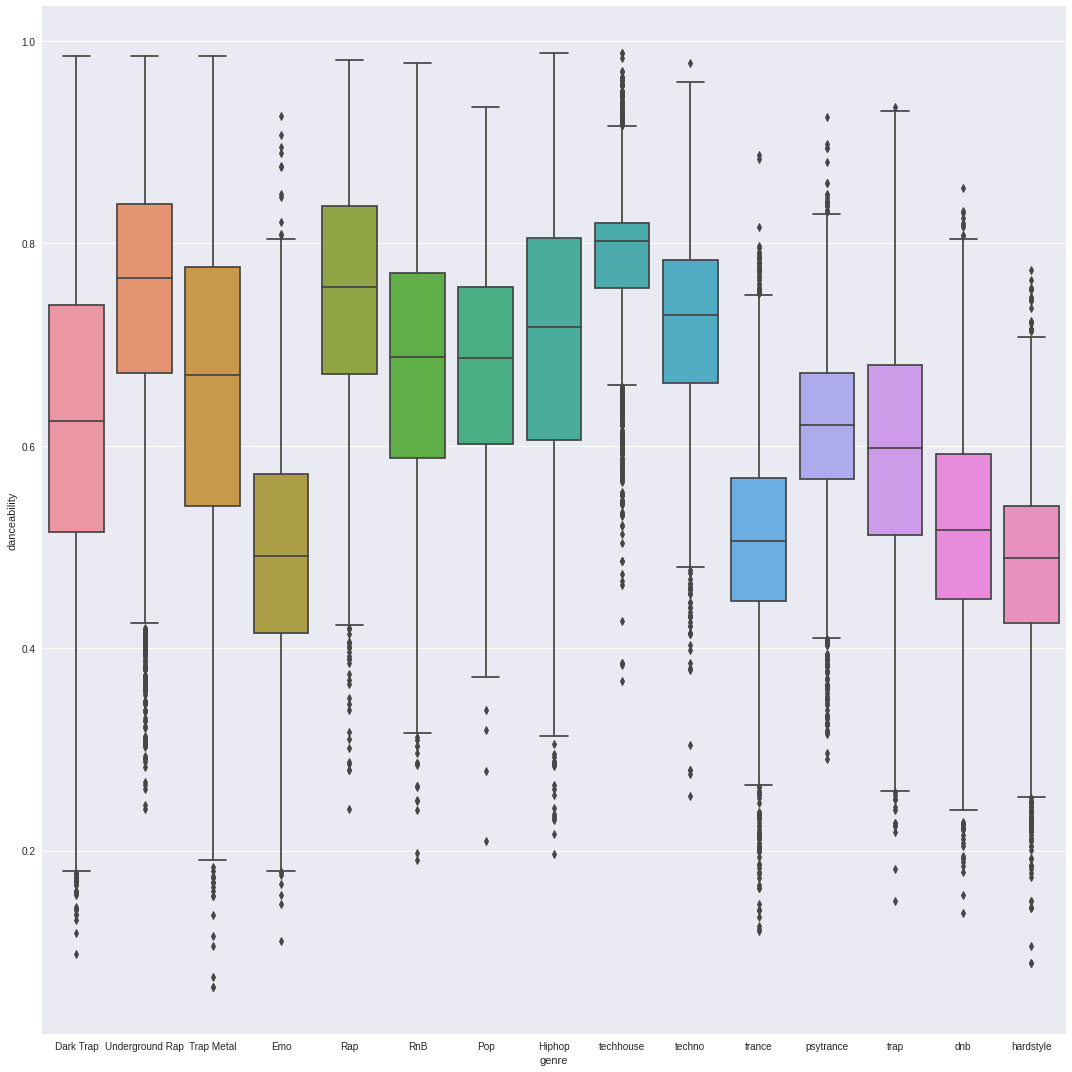

In [ ]:
style.use('seaborn')
sb.catplot(data = df, x = 'genre', y = 'danceability', kind = 'box', height = 15)

In [ ]:
px.box(data_frame = df, y = 'tempo', color = 'genre')

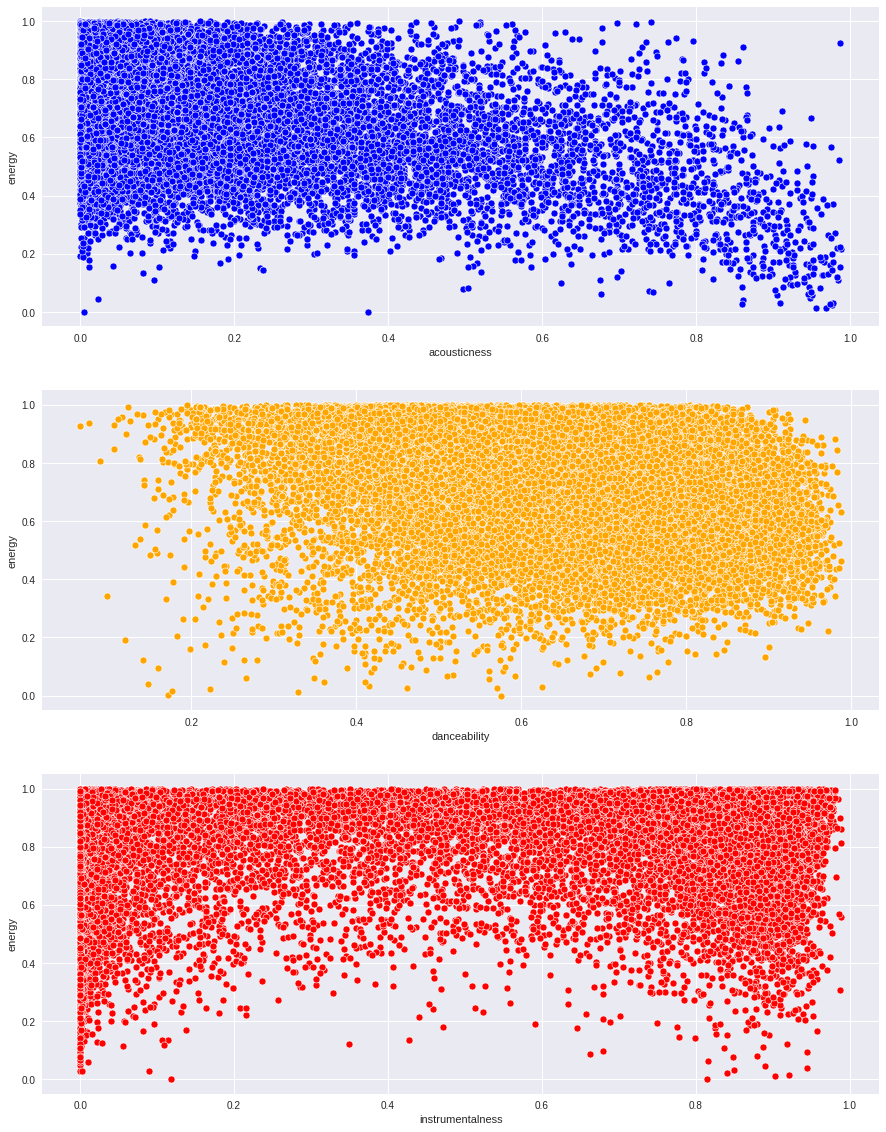

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (15,20))
sns.scatterplot(x = df['acousticness'], y = df['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = df['danceability'], y = df['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = df['instrumentalness'], y = df['energy'], ax = ax[2], color = "red")

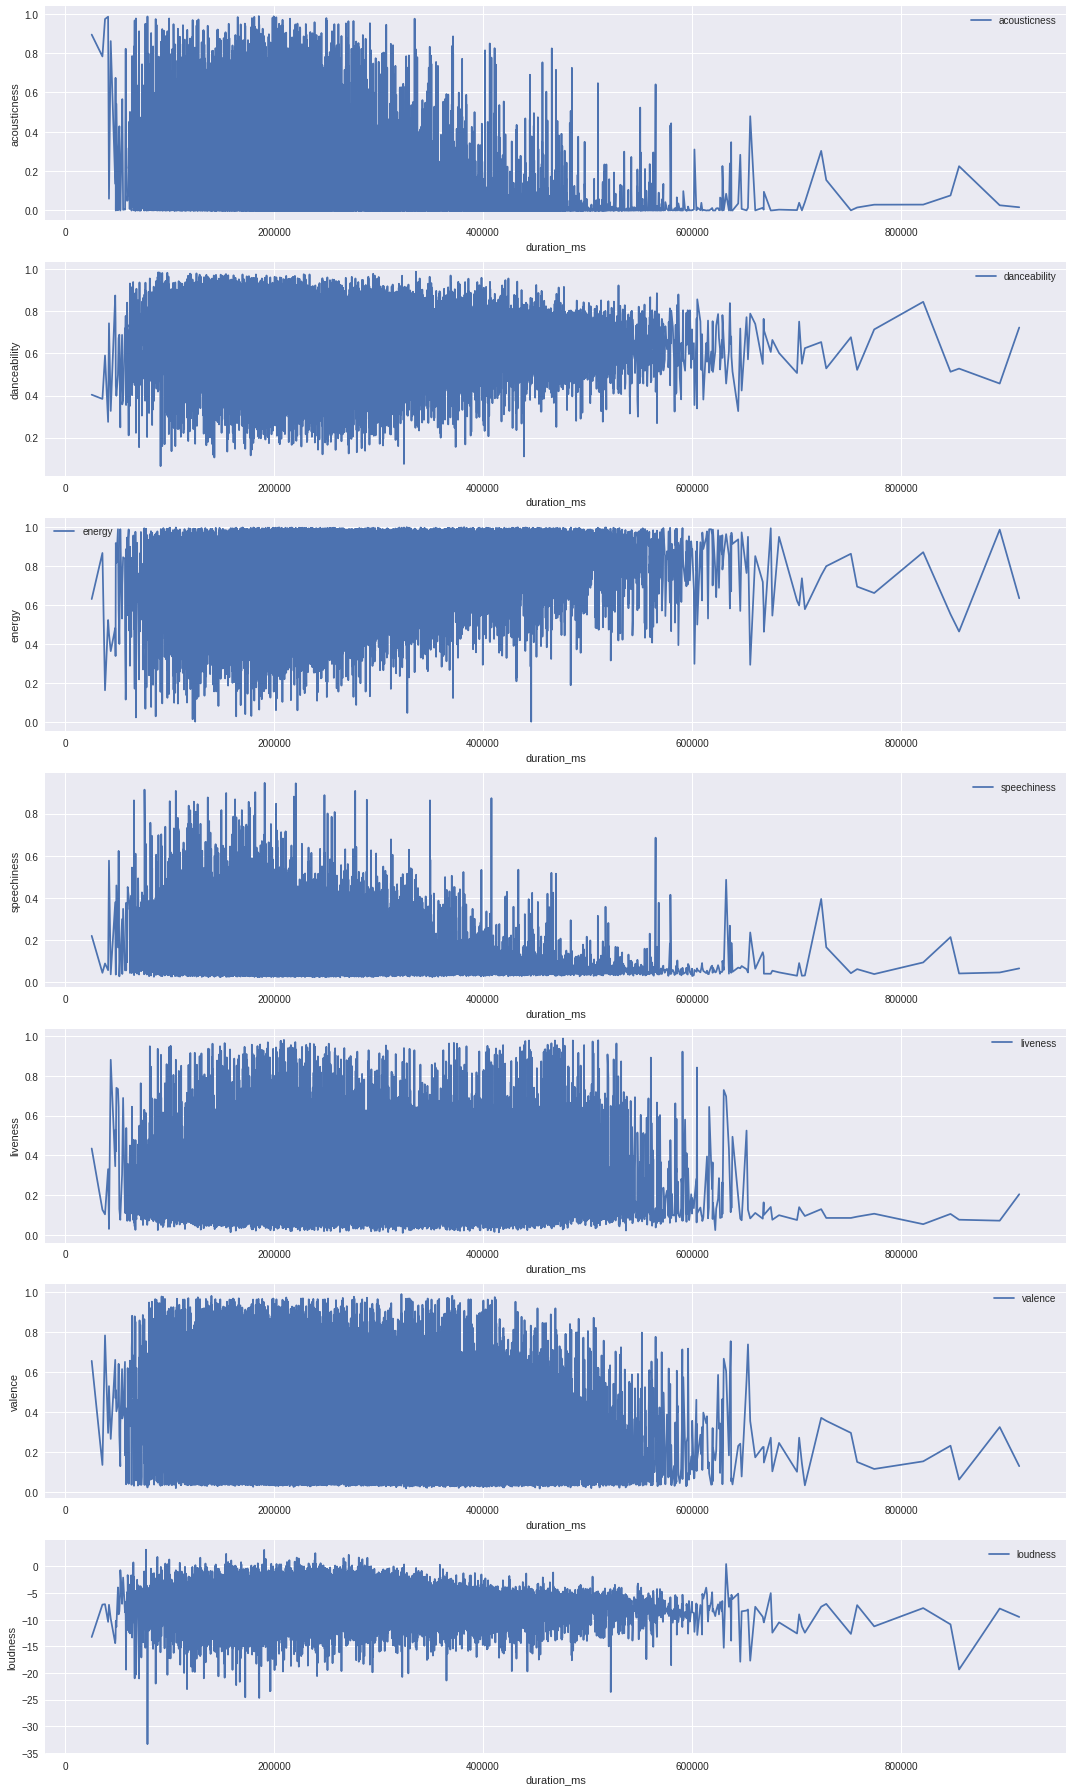

In [ ]:
fig, ax = plt.subplots(7, 1, figsize = (15, 25))
columns = ["acousticness","danceability","energy","speechiness","liveness","valence", "loudness"]
i = 0
for col in columns:
    x = df.groupby("duration_ms")[col].mean()
    sns.lineplot(x=x.index,y=x,label=col, ax = ax[i])
    i += 1
plt.tight_layout()

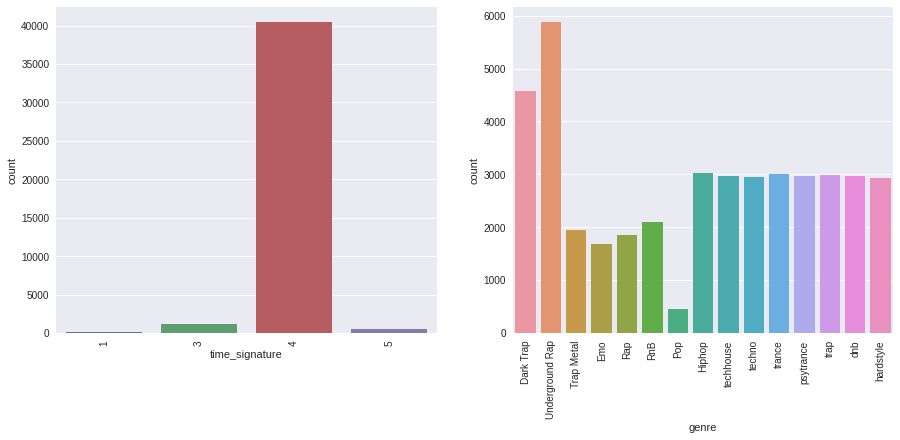

In [ ]:
categorical_cols = ['time_signature', 'genre']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)

plt.show()

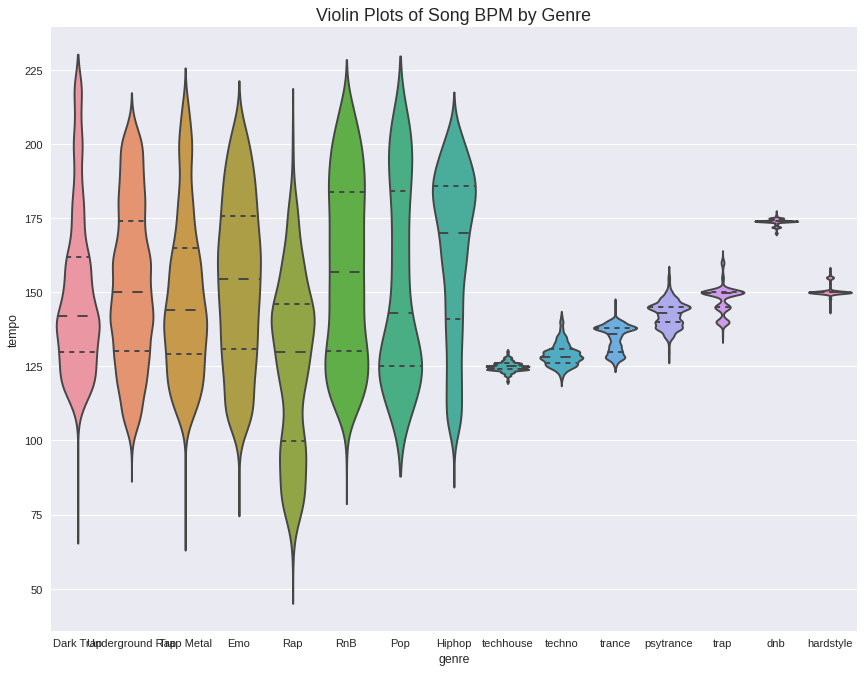

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='genre', y='tempo', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plots of Song BPM by Genre', fontsize=16)
plt.show()

# Clustering multidimensionale

## Normalizzazione

<h3> Conversione dei valori del genere da categorici a numerici

In [10]:
df['genre'] = df["genre"].map( {'Dark Trap':1, 'Underground Rap':2, 'Trap Metal':3, 'Emo':4, 'Rap':5, 'RnB':6,
       'Pop':7, 'Hiphop':8, 'techhouse':9, 'techno':10, 'trance':11, 'psytrance':12,
       'trap':13, 'dnb':14, 'hardstyle':15})

x = df
x.head()

danceability  energy  key  loudness  speechiness  acousticness  \
0         0.831   0.814    2    -7.364       0.4200        0.0598   
1         0.719   0.493    8    -7.230       0.0794        0.4010   
2         0.850   0.893    5    -4.783       0.0623        0.0138   
3         0.476   0.781    0    -4.710       0.1030        0.0237   
4         0.798   0.624    2    -7.668       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.013400    0.0556   0.3890  156.985       124539               4   
1          0.000000    0.1180   0.1240  115.080       224427               4   
2          0.000004    0.3720   0.0391  218.050        98821               4   
3          0.000000    0.1140   0.1750  186.948       123661               3   
4          0.000000    0.1660   0.5910  147.988       123298               4   

   genre  
0      1  
1      1  
2      1  
3      1  
4      1

In [11]:
# Escludiamo le colonne categoriche dal processo di normalizzazione
x_to_normalize = x.iloc[:,:-2]

# Normalizzazione
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_to_normalize)

# Conversione in dataframe 
x_scaled = pd.DataFrame(x_scaled)
# x_scaled = pd.concat([x_scaled,df.iloc[:,-2:]], axis=1)
x_scaled

0         1         2         3         4         5         6   \
0      0.829884  0.813955  0.181818  0.712039  0.430304  0.060525  0.013549   
1      0.708527  0.492877  0.727273  0.715710  0.061410  0.405870  0.000000   
2      0.850471  0.892974  0.454545  0.782742  0.042890  0.013967  0.000004   
3      0.445227  0.780947  0.000000  0.784742  0.086971  0.023987  0.000000   
4      0.794127  0.623909  0.181818  0.703712  0.292754  0.219635  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
42300  0.501571  0.692925  0.363636  0.772743  0.008340  0.031882  0.000349   
42301  0.489652  0.767944  0.000000  0.696754  0.027293  0.022772  0.000018   
42302  0.320620  0.820956  0.727273  0.828791  0.030109  0.026315  0.000245   
42303  0.446311  0.920981  0.545455  0.782906  0.017871  0.000557  0.029929   
42304  0.502655  0.944987  0.818182  0.753184  0.042023  0.001912  0.000055   

             7         8         9         10  
0      0.045943  0.382028  0.610006  0.111487  
1      0.109792  0.108635  0.351848  0.224043  
2      0.369692  0.021046  0.986200  0.082507  
3      0.105699  0.161250  0.794595  0.110497  
4      0.158907  0.590426  0.554579  0.110088  
...         ...       ...       ...       ...  
42300  0.112862  0.387187  0.567055  0.274503  
42301  0.198813  0.375838  0.566531  0.207912  
42302  0.382994  0.108635  0.597377  0.235757  
42303  0.047887  0.484164  0.567233  0.335342  
42304  0.412668  0.118952  0.598067  0.153880  

[42305 rows x 11 columns]

In [12]:
pd.DataFrame(x_scaled).describe()

0             1             2             3             4   \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.622239      0.762458      0.488204      0.736654      0.123319   
std        0.169701      0.183868      0.333286      0.080569      0.136649   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.497237      0.631911      0.090909      0.690207      0.028593   
50%        0.629429      0.802952      0.545455      0.742994      0.057186   
75%        0.759454      0.922981      0.818182      0.790138      0.184447   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 5             6             7             8             9   \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.097327      0.286196      0.208103      0.349119      0.551413   
std        0.172902      0.374915      0.179654      0.240586      0.146896   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.001750      0.000000      0.090965      0.146807      0.443338   
50%        0.016598      0.006006      0.127187      0.312906      0.536005   
75%        0.108299      0.730030      0.289880      0.519241      0.637599   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 10  
count  42305.000000  
mean       0.253834  
std        0.116015  
min        0.000000  
25%        0.173801  
50%        0.224418  
75%        0.310477  
max        1.000000

## PCA

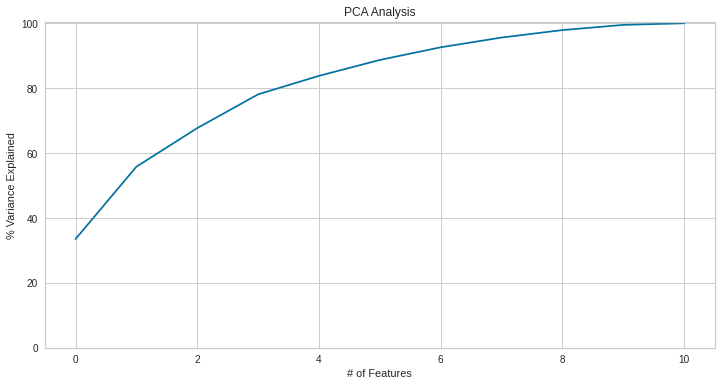

In [13]:
pca = PCA(n_components = len(x_scaled.columns) )
pca.fit(x_scaled)
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(variance,3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [14]:
pca = PCA(n_components=2).fit(x_scaled)
x_pca = pca.transform(x_scaled)
x_scaled.shape, x_pca.shape

((42305, 11), (42305, 2))

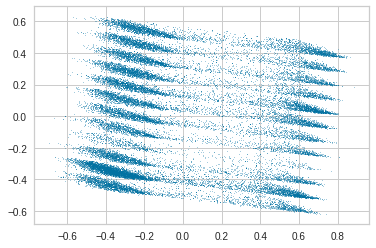

In [15]:
cmap = cm.get_cmap('gnuplot')
plt.scatter(x_pca[:,0], x_pca[:, 1], s = 0.1,)

## K-Means

<h3> Determiniamo il numero ottimale di cluster utilizzando la silhouette come metrica

In [ ]:
scores = []
for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_, metric='euclidean')
    print(k, score)

2 0.5123147382767855
3 0.5216169922459969
4 0.530942761379782


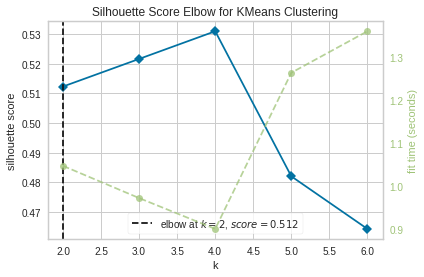

Optimal number of clusters: 2


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(x_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

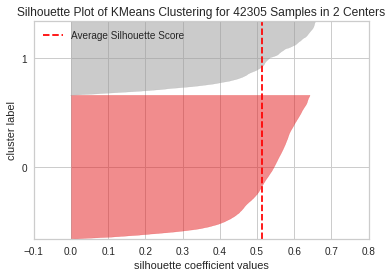

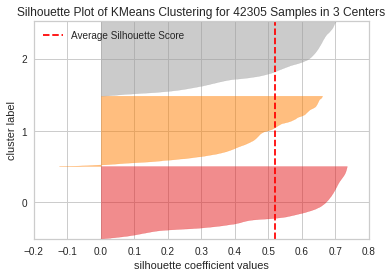

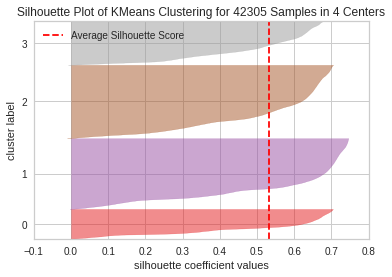

In [ ]:
for i in range(2, 5):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(x_pca)    
  sil_visualizer.show()

### Usando 4 cluster 

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_pca)

KMeans(n_clusters=4, random_state=42)

<h3> Centroidi

In [17]:
# Le dimensioni però sono quelle della PCA
centers_pca = kmeans.cluster_centers_

# Antitrasformata per tornare nelle dimensioni originali
centers_original = pd.DataFrame(pca.inverse_transform(centers_pca), columns = x.columns[:-2])

centers_original

danceability    energy       key  loudness  speechiness  acousticness  \
0      0.579204  0.853505  0.180402  0.724952     0.041878      0.011953   
1      0.639157  0.708365  0.168181  0.742099     0.163981      0.135963   
2      0.645896  0.716826  0.763881  0.742883     0.166001      0.143034   
3      0.584316  0.865006  0.754822  0.725313     0.041010      0.015909   

   instrumentalness  liveness   valence     tempo  duration_ms  
0          0.756413  0.213511  0.197734  0.507017     0.347646  
1          0.040683  0.205247  0.389235  0.573175     0.200731  
2          0.042355  0.205306  0.437020  0.574778     0.206182  
3          0.774526  0.213759  0.239374  0.507038     0.356287

 Sembra che la maggior differenza tra i centroidi sia legata alle feature "instrumentalness" e "Key"

<h3> Plot dei cluster nello spazio della PCA

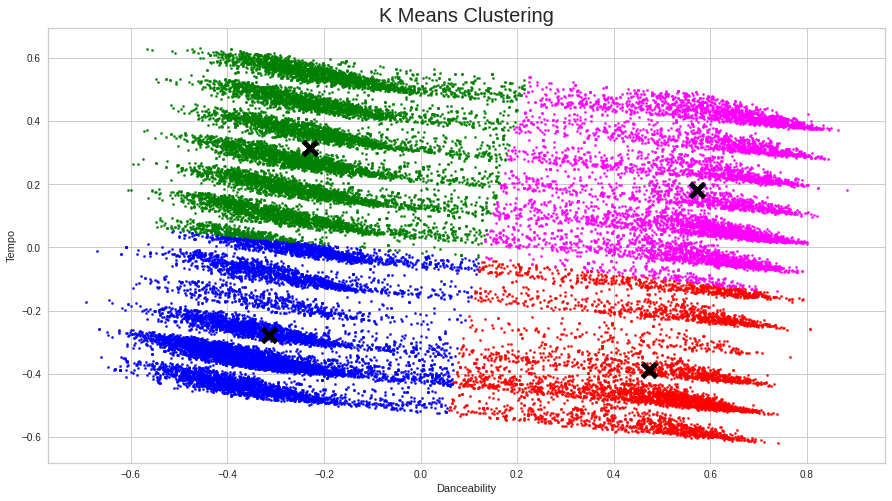

In [19]:
# calcoliamo le predizioni
y_means = kmeans.predict(x_pca)

# plot dei vari cluster
plt.figure(figsize=(15,8))

plt.scatter(x_pca[y_means == 0, 0], x_pca[y_means == 0, 1], s = 5, c = 'red')
plt.scatter(x_pca[y_means == 1, 0], x_pca[y_means == 1, 1], s = 5, c = 'blue')
plt.scatter(x_pca[y_means == 2, 0], x_pca[y_means == 2, 1], s = 5, c = 'green')
plt.scatter(x_pca[y_means == 3, 0], x_pca[y_means == 3, 1], s = 5, c = 'magenta')

# centroidi
plt.scatter(centers_pca[:, 0], 
           centers_pca[:, 1], 
           marker='x', s=200, linewidth=5, color='black', zorder=50)

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.legend()
plt.show()

### Usando 2 cluster

In [21]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_pca)

KMeans(n_clusters=2, random_state=42)

<h3> Centroidi

In [22]:
# Le dimensioni però sono quelle della PCA
centers_pca = kmeans.cluster_centers_

# Antitrasformata per tornare nelle dimensioni originali
centers_original = pd.DataFrame(pca.inverse_transform(centers_pca), columns = x.columns[:-2])

centers_original

danceability    energy       key  loudness  speechiness  acousticness  \
0      0.642569  0.712606  0.468757  0.742498     0.165024      0.139555   
1      0.582332  0.860315  0.526376  0.725183     0.041454      0.014436   

   instrumentalness  liveness   valence     tempo  duration_ms  
0          0.041386  0.205275  0.413384  0.573997     0.203453  
1          0.766744  0.213654  0.222970  0.507083     0.352731

 Sembra che la maggior differenza tra i centroidi sia legata alla feature "instrumentalness"

<h3> Plot dei cluster nello spazio della PCA

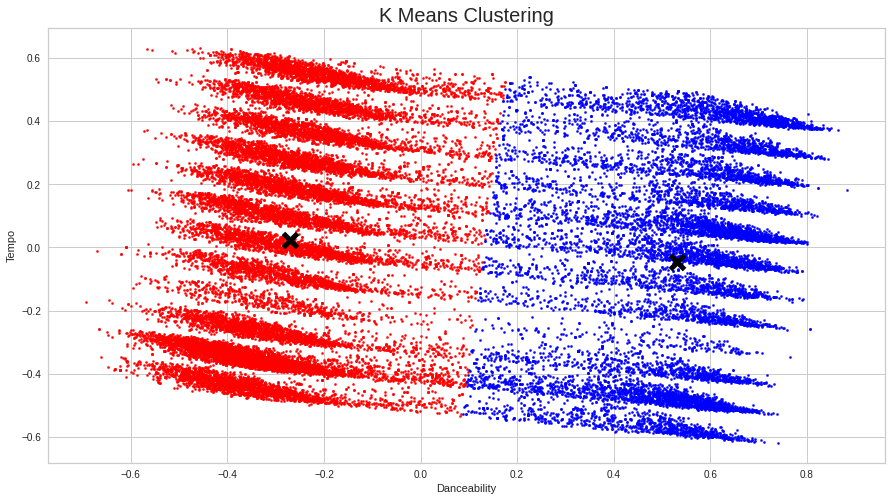

In [23]:
# calcoliamo le predizioni
y_means = kmeans.predict(x_pca)

# plot dei vari cluster
plt.figure(figsize=(15,8))

plt.scatter(x_pca[y_means == 0, 0], x_pca[y_means == 0, 1], s = 5, c = 'red')
plt.scatter(x_pca[y_means == 1, 0], x_pca[y_means == 1, 1], s = 5, c = 'blue')
plt.scatter(x_pca[y_means == 2, 0], x_pca[y_means == 2, 1], s = 5, c = 'green')
plt.scatter(x_pca[y_means == 3, 0], x_pca[y_means == 3, 1], s = 5, c = 'magenta')

# centroidi
plt.scatter(centers_pca[:, 0], 
           centers_pca[:, 1], 
           marker='x', s=200, linewidth=5, color='black', zorder=50)

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.legend()
plt.show()

#### Vogliamo capire se i cluster sono rappresentativi per un certo insieme di Generi

<h3> Aggiungiamo la colonna "genre"

In [ ]:
x

danceability  energy  key  loudness  speechiness  acousticness  \
0             0.831   0.814    2    -7.364       0.4200      0.059800   
1             0.719   0.493    8    -7.230       0.0794      0.401000   
2             0.850   0.893    5    -4.783       0.0623      0.013800   
3             0.476   0.781    0    -4.710       0.1030      0.023700   
4             0.798   0.624    2    -7.668       0.2930      0.217000   
...             ...     ...  ...       ...          ...           ...   
42300         0.528   0.693    4    -5.148       0.0304      0.031500   
42301         0.517   0.768    0    -7.922       0.0479      0.022500   
42302         0.361   0.821    8    -3.102       0.0505      0.026000   
42303         0.477   0.921    6    -4.777       0.0392      0.000551   
42304         0.529   0.945    9    -5.862       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.013400    0.0556   0.3890  156.985       124539   
1              0.000000    0.1180   0.1240  115.080       224427   
2              0.000004    0.3720   0.0391  218.050        98821   
3              0.000000    0.1140   0.1750  186.948       123661   
4              0.000000    0.1660   0.5910  147.988       123298   
...                 ...       ...      ...      ...          ...   
42300          0.000345    0.1210   0.3940  150.013       269208   
42301          0.000018    0.2050   0.3830  149.928       210112   
42302          0.000242    0.3850   0.1240  154.935       234823   
42303          0.029600    0.0575   0.4880  150.042       323200   
42304          0.000055    0.4140   0.1340  155.047       162161   

       time_signature  genre  
0                   4      1  
1                   4      1  
2                   4      1  
3                   3      1  
4                   4      1  
...               ...    ...  
42300               4     15  
42301               4     15  
42302               4     15  
42303               4     15  
42304               4     15  

[42305 rows x 13 columns]

In [ ]:
# per ogni elemento c'è una colonna che rappresenta il cluster predetto
predicted = pd.DataFrame(kmeans.predict(x_pca), columns=["cluster"])

# trasformiamo il dataset portandolo nello spazio di partenza
predicted_t = pd.DataFrame(pca.inverse_transform(x_pca), columns = x.columns[:-2] )

# concateniamo i due dataframe, otteniamo il dataset con affianco la colonna della predizione
predictions = pd.concat([predicted_t, predicted ], axis=1)

# concateniamo il genere

x_copy = x.copy()
x_copy['genre'] = x["genre"].map( {1:'Dark Trap', 2:'Underground Rap', 3:'Trap Metal', 4:'Emo', 5:'Rap', 6:'RnB',
       7:'Pop', 8:'Hiphop', 9:'techhouse', 10:'techno', 11:'trance', 12:'psytrance',
       13:'trap', 14:'dnb', 15:'hardstyle'})


predictions = pd.concat([predictions,x_copy["genre"] ], axis=1)

predictions

danceability    energy       key  loudness  speechiness  acousticness  \
0          0.644422  0.696273  0.182867  0.743574     0.174395      0.146672   
1          0.645845  0.714336  0.700924  0.742989     0.167133      0.143654   
2          0.637795  0.722400  0.427246  0.741214     0.156134      0.130170   
3          0.634329  0.712228 -0.019446  0.741079     0.157844      0.128145   
4          0.651573  0.679572  0.196119  0.745591     0.188669      0.161294   
...             ...       ...       ...       ...          ...           ...   
42300      0.639237  0.716116  0.359610  0.741755     0.160390      0.133926   
42301      0.635144  0.710976 -0.002214  0.741279     0.159163      0.129631   
42302      0.635561  0.739095  0.699725  0.740054     0.146253      0.122421   
42303      0.636429  0.730866  0.551841  0.740585     0.150915      0.125914   
42304      0.636891  0.739776  0.793473  0.740255     0.147119      0.124090   

       instrumentalness  liveness   valence     tempo  duration_ms  cluster  \
0             -0.020005  0.204547  0.406746  0.578830     0.188408        0   
1              0.034299  0.205209  0.434089  0.575338     0.203990        0   
2              0.092534  0.205863  0.396267  0.569144     0.213588        0   
3              0.072384  0.205600  0.365517  0.569689     0.205624        0   
4             -0.103345  0.203586  0.430233  0.586577     0.171427        0   
...                 ...       ...       ...       ...          ...      ...   
42300          0.066062  0.205553  0.397910  0.571392     0.207578        0   
42301          0.065044  0.205517  0.368887  0.570418     0.204267        0   
42302          0.156614  0.206621  0.401096  0.564022     0.229068        0   
42303          0.125941  0.206257  0.397371  0.566422     0.221509        0   
42304          0.153666  0.206594  0.409480  0.564571     0.229268        0   

           genre  
0      Dark Trap  
1      Dark Trap  
2      Dark Trap  
3      Dark Trap  
4      Dark Trap  
...          ...  
42300  hardstyle  
42301  hardstyle  
42302  hardstyle  
42303  hardstyle  
42304  hardstyle  

[42305 rows x 13 columns]

In [ ]:
genere_cluster = predictions.groupby(["cluster","genre"])["genre"].agg('count')

genere_cluster = pd.DataFrame(genere_cluster).rename(columns={'genre':'Conteggio'}).reset_index()

genere_cluster = genere_cluster.pivot_table(index='cluster', columns='genre', values='Conteggio', aggfunc='sum')

genere_cluster = genere_cluster.assign(elementi_cluster=genere_cluster.sum(axis=1))

genere_cluster

genre    Dark Trap   Emo  Hiphop  Pop   Rap   RnB  Trap Metal  \
cluster                                                         
0             3110  1660    2991  456  1840  2087        1846   
1             1468    20      37    5     8    12         110   

genre    Underground Rap   dnb  hardstyle  psytrance  techhouse  techno  \
cluster                                                                   
0                   5755  1272       2435         75        976      62   
1                    120  1694        501       2886       1999    2894   

genre    trance  trap  elementi_cluster  
cluster                                  
0          1155  2304             28024  
1          1844   683             14281

<h3> Per ogni genere diciamo quanta percentuale di brani sono presenti in ogni cluster

In [ ]:
def percentuale(colonna):
    return colonna / colonna.sum()

df_percentuale = genere_cluster.apply(percentuale)

format = {}
for elem in df_percentuale.columns:
  format[elem] = "{:.2%}"

df_percentuale = df_percentuale.style.format(format)

df_percentuale

<h3> Stampiamo l'heatmap 

In [ ]:
def percentuale(colonna):
    return colonna / colonna.sum()

df_percentuale = genere_cluster.apply(percentuale)

df_percentuale = df_percentuale.round(2)

df_percentuale

genre    Dark Trap   Emo  Hiphop   Pop  Rap   RnB  Trap Metal  \
cluster                                                         
0             0.68  0.99    0.99  0.99  1.0  0.99        0.94   
1             0.32  0.01    0.01  0.01  0.0  0.01        0.06   

genre    Underground Rap   dnb  hardstyle  psytrance  techhouse  techno  \
cluster                                                                   
0                   0.98  0.43       0.83       0.03       0.33    0.02   
1                   0.02  0.57       0.17       0.97       0.67    0.98   

genre    trance  trap  elementi_cluster  
cluster                                  
0          0.39  0.77              0.66  
1          0.61  0.23              0.34

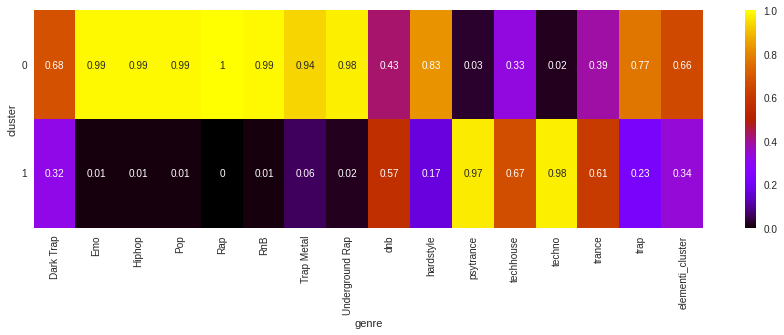

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(df_percentuale, cmap = cmap, annot=True)
plt.yticks(rotation='horizontal')
plt.show()

<h3> Per ogni cluster stampiamo la lista di generi con un numero di elementi maggiore del 60%

In [ ]:
df_percentuale_trasposto = df_percentuale.T[:-1]
maggioranza_instrumentalness_bassa = df_percentuale_trasposto[df_percentuale_trasposto[0] > 0.6]
maggioranza_instrumentalness_alta = df_percentuale_trasposto[df_percentuale_trasposto[1] > 0.6]

fuori_cluster = df_percentuale_trasposto[(df_percentuale_trasposto[0] < 0.6) & (df_percentuale_trasposto[1] < 0.6)]


In [ ]:
display(maggioranza_instrumentalness_bassa.T), display(maggioranza_instrumentalness_alta.T), display(fuori_cluster.T)

genre    Dark Trap   Emo  Hiphop   Pop  Rap   RnB  Trap Metal  \
cluster                                                         
0             0.68  0.99    0.99  0.99  1.0  0.99        0.94   
1             0.32  0.01    0.01  0.01  0.0  0.01        0.06   

genre    Underground Rap  hardstyle  trap  
cluster                                    
0                   0.98       0.83  0.77  
1                   0.02       0.17  0.23

genre    psytrance  techhouse  techno  trance
cluster                                      
0             0.03       0.33    0.02    0.39
1             0.97       0.67    0.98    0.61

genre     dnb
cluster      
0        0.43
1        0.57

(None, None, None)

## DBSCAN

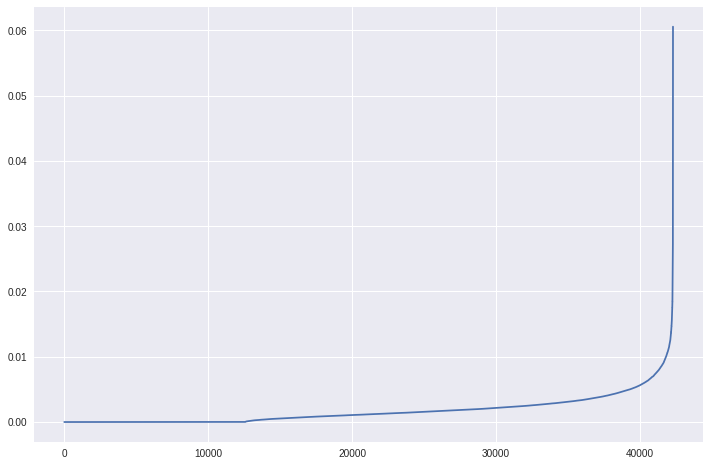

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_pca)
distances, indices = nbrs.kneighbors(x_pca)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
#dbscan=DBSCAN(eps=0.02,min_samples=70,metric='euclidean')
dbscan=DBSCAN(eps=0.03,min_samples=70,metric='euclidean')
model=dbscan.fit(x_pca)
labels=model.labels_
Counter(labels)

Counter({0: 9405,
         1: 15947,
         -1: 5328,
         5: 2555,
         11: 165,
         2: 1408,
         12: 73,
         3: 413,
         4: 3604,
         6: 1476,
         7: 153,
         9: 574,
         8: 607,
         10: 597})

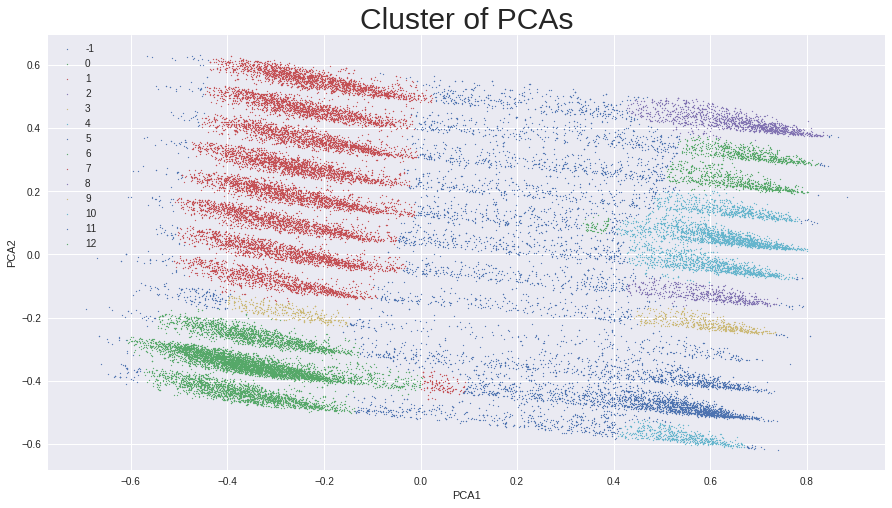

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

#plotting the results:
u_labels = np.unique(labels)
for i in u_labels:

    plt.scatter(x_pca[labels == i , 0] , x_pca[labels == i , 1] , label = i, s=1)

plt.legend()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### Vogliamo capire se i cluster sono rappresentativi per un certo insieme di Generi

<h3> Aggiungiamo la colonna "genre"

In [ ]:
# per ogni elemento c'è una colonna che rappresenta il cluster predetto
predicted = pd.DataFrame(model.labels_, columns=["cluster"])

# trasformiamo il dataset portandolo nello spazio di partenza
predicted_t = pd.DataFrame(pca.inverse_transform(x_pca), columns = x.columns[:-2] )

# concateniamo i due dataframe, otteniamo il dataset con affianco la colonna della predizione
predictions = pd.concat([predicted_t, predicted ], axis=1)

# concateniamo il genere

x_copy = x.copy()
x_copy['genre'] = x["genre"].map( {1:'Dark Trap', 2:'Underground Rap', 3:'Trap Metal', 4:'Emo', 5:'Rap', 6:'RnB',
       7:'Pop', 8:'Hiphop', 9:'techhouse', 10:'techno', 11:'trance', 12:'psytrance',
       13:'trap', 14:'dnb', 15:'hardstyle'})


predictions = pd.concat([predictions,x_copy["genre"] ], axis=1)

predictions

danceability    energy       key  loudness  speechiness  acousticness  \
0          0.644422  0.696273  0.182867  0.743574     0.174395      0.146672   
1          0.645845  0.714336  0.700924  0.742989     0.167133      0.143654   
2          0.637795  0.722400  0.427246  0.741214     0.156134      0.130170   
3          0.634329  0.712228 -0.019446  0.741079     0.157844      0.128145   
4          0.651573  0.679572  0.196119  0.745591     0.188669      0.161294   
...             ...       ...       ...       ...          ...           ...   
42300      0.639237  0.716116  0.359610  0.741755     0.160390      0.133926   
42301      0.635144  0.710976 -0.002214  0.741279     0.159163      0.129631   
42302      0.635561  0.739095  0.699725  0.740054     0.146253      0.122421   
42303      0.636429  0.730866  0.551841  0.740585     0.150915      0.125914   
42304      0.636891  0.739776  0.793473  0.740255     0.147119      0.124090   

       instrumentalness  liveness   valence     tempo  duration_ms  cluster  \
0             -0.020005  0.204547  0.406746  0.578830     0.188408        0   
1              0.034299  0.205209  0.434089  0.575338     0.203990        1   
2              0.092534  0.205863  0.396267  0.569144     0.213588        1   
3              0.072384  0.205600  0.365517  0.569689     0.205624        0   
4             -0.103345  0.203586  0.430233  0.586577     0.171427        0   
...                 ...       ...       ...       ...          ...      ...   
42300          0.066062  0.205553  0.397910  0.571392     0.207578        1   
42301          0.065044  0.205517  0.368887  0.570418     0.204267        0   
42302          0.156614  0.206621  0.401096  0.564022     0.229068        1   
42303          0.125941  0.206257  0.397371  0.566422     0.221509        1   
42304          0.153666  0.206594  0.409480  0.564571     0.229268        1   

           genre  
0      Dark Trap  
1      Dark Trap  
2      Dark Trap  
3      Dark Trap  
4      Dark Trap  
...          ...  
42300  hardstyle  
42301  hardstyle  
42302  hardstyle  
42303  hardstyle  
42304  hardstyle  

[42305 rows x 13 columns]

In [ ]:
genere_cluster = predictions.groupby(["cluster","genre"])["genre"].agg('count')

genere_cluster = pd.DataFrame(genere_cluster).rename(columns={'genre':'Conteggio'}).reset_index()

genere_cluster = genere_cluster.pivot_table(index='cluster', columns='genre', values='Conteggio', aggfunc='sum')

genere_cluster = genere_cluster.assign(elementi_cluster=genere_cluster.sum(axis=1)).fillna(0)

genere_cluster

genre    Dark Trap     Emo  Hiphop    Pop     Rap     RnB  Trap Metal  \
cluster                                                                 
-1           713.0    49.0   134.0    9.0    46.0    41.0       108.0   
 0          1074.0   533.0   922.0  136.0   695.0   740.0       815.0   
 1          1737.0  1032.0  1925.0  304.0  1082.0  1285.0       955.0   
 2           110.0     0.0     1.0    1.0     0.0     0.0         2.0   
 3            30.0    62.0    30.0    8.0    16.0    28.0        22.0   
 4           282.0     0.0     3.0    1.0     1.0     3.0        13.0   
 5           229.0     2.0     4.0    1.0     2.0     1.0        16.0   
 6           165.0     1.0     1.0    1.0     1.0     0.0         6.0   
 7            12.0     0.0     2.0    0.0     2.0     0.0         6.0   
 8            81.0     1.0     1.0    0.0     0.0     1.0         2.0   
 9            49.0     0.0     0.0    0.0     1.0     0.0         5.0   
 10           63.0     0.0     1.0    0.0     0.0     0.0         1.0   
 11           22.0     0.0     3.0    0.0     2.0     0.0         3.0   
 12           11.0     0.0     1.0    0.0     0.0     0.0         2.0   

genre    Underground Rap    dnb  hardstyle  psytrance  techhouse  techno  \
cluster                                                                    
-1                 258.0  735.0      442.0      326.0      965.0   183.0   
 0                2239.0  309.0      587.0       13.0      209.0    14.0   
 1                3268.0  651.0     1582.0       16.0      445.0    22.0   
 2                   7.0  114.0       21.0      375.0      277.0   346.0   
 3                  47.0   18.0       57.0        0.0       19.0     0.0   
 4                  10.0  334.0       64.0     1048.0      375.0   969.0   
 5                  21.0  288.0       48.0      502.0      331.0   688.0   
 6                   5.0  204.0       35.0      299.0      148.0   321.0   
 7                   7.0   27.0       13.0        3.0       23.0     0.0   
 8                   0.0  113.0       27.0      107.0       48.0    84.0   
 9                   1.0   79.0       15.0       96.0       40.0   194.0   
 10                  4.0   52.0       21.0      157.0       60.0   127.0   
 11                  7.0   33.0       14.0       10.0       20.0     3.0   
 12                  1.0    9.0       10.0        9.0       15.0     5.0   

genre    trance    trap  elementi_cluster  
cluster                                    
-1        744.0   575.0            5328.0  
 0        277.0   842.0            9405.0  
 1        528.0  1115.0           15947.0  
 2        124.0    30.0            1408.0  
 3         43.0    33.0             413.0  
 4        436.0    65.0            3604.0  
 5        279.0   143.0            2555.0  
 6        251.0    38.0            1476.0  
 7         15.0    43.0             153.0  
 8        100.0    42.0             607.0  
 9         80.0    14.0             574.0  
 10       102.0     9.0             597.0  
 11        11.0    37.0             165.0  
 12         9.0     1.0              73.0

<h3> Per ogni genere diciamo quanta percentuale di brani sono presenti in ogni cluster

In [ ]:
def percentuale(colonna):
    return colonna / colonna.sum()

df_percentuale = genere_cluster.apply(percentuale)

df_percentuale = df_percentuale.round(2)

df_percentuale

genre    Dark Trap   Emo  Hiphop   Pop   Rap   RnB  Trap Metal  \
cluster                                                          
-1            0.16  0.03    0.04  0.02  0.02  0.02        0.06   
 0            0.23  0.32    0.30  0.30  0.38  0.35        0.42   
 1            0.38  0.61    0.64  0.66  0.59  0.61        0.49   
 2            0.02  0.00    0.00  0.00  0.00  0.00        0.00   
 3            0.01  0.04    0.01  0.02  0.01  0.01        0.01   
 4            0.06  0.00    0.00  0.00  0.00  0.00        0.01   
 5            0.05  0.00    0.00  0.00  0.00  0.00        0.01   
 6            0.04  0.00    0.00  0.00  0.00  0.00        0.00   
 7            0.00  0.00    0.00  0.00  0.00  0.00        0.00   
 8            0.02  0.00    0.00  0.00  0.00  0.00        0.00   
 9            0.01  0.00    0.00  0.00  0.00  0.00        0.00   
 10           0.01  0.00    0.00  0.00  0.00  0.00        0.00   
 11           0.00  0.00    0.00  0.00  0.00  0.00        0.00   
 12           0.00  0.00    0.00  0.00  0.00  0.00        0.00   

genre    Underground Rap   dnb  hardstyle  psytrance  techhouse  techno  \
cluster                                                                   
-1                  0.04  0.25       0.15       0.11       0.32    0.06   
 0                  0.38  0.10       0.20       0.00       0.07    0.00   
 1                  0.56  0.22       0.54       0.01       0.15    0.01   
 2                  0.00  0.04       0.01       0.13       0.09    0.12   
 3                  0.01  0.01       0.02       0.00       0.01    0.00   
 4                  0.00  0.11       0.02       0.35       0.13    0.33   
 5                  0.00  0.10       0.02       0.17       0.11    0.23   
 6                  0.00  0.07       0.01       0.10       0.05    0.11   
 7                  0.00  0.01       0.00       0.00       0.01    0.00   
 8                  0.00  0.04       0.01       0.04       0.02    0.03   
 9                  0.00  0.03       0.01       0.03       0.01    0.07   
 10                 0.00  0.02       0.01       0.05       0.02    0.04   
 11                 0.00  0.01       0.00       0.00       0.01    0.00   
 12                 0.00  0.00       0.00       0.00       0.01    0.00   

genre    trance  trap  elementi_cluster  
cluster                                  
-1         0.25  0.19              0.13  
 0         0.09  0.28              0.22  
 1         0.18  0.37              0.38  
 2         0.04  0.01              0.03  
 3         0.01  0.01              0.01  
 4         0.15  0.02              0.09  
 5         0.09  0.05              0.06  
 6         0.08  0.01              0.03  
 7         0.01  0.01              0.00  
 8         0.03  0.01              0.01  
 9         0.03  0.00              0.01  
 10        0.03  0.00              0.01  
 11        0.00  0.01              0.00  
 12        0.00  0.00              0.00

# Clustering tridimensionale

## Danceability - Tempo - Energy

<h3> Eliminiamo le colonne non utili

In [36]:
df_dte = df[['danceability','tempo','energy']]
colonne = df_dte.columns
df_dte

danceability    tempo  energy
0             0.831  156.985   0.814
1             0.719  115.080   0.493
2             0.850  218.050   0.893
3             0.476  186.948   0.781
4             0.798  147.988   0.624
...             ...      ...     ...
42300         0.528  150.013   0.693
42301         0.517  149.928   0.768
42302         0.361  154.935   0.821
42303         0.477  150.042   0.921
42304         0.529  155.047   0.945

[42305 rows x 3 columns]

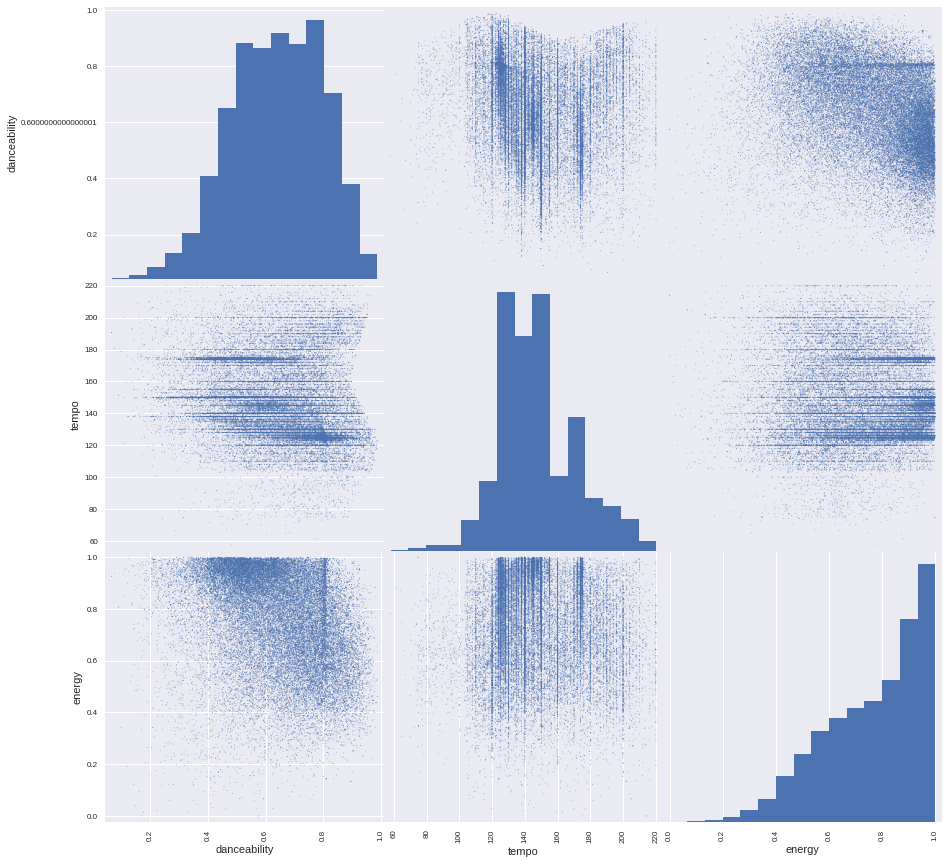

In [ ]:
scatter = pd.plotting.scatter_matrix(df_dte, marker = 'o', s=1, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

<h3> Normalizziamo

In [37]:
# Normalizzazione
scaler = MinMaxScaler()
df_dte_normalized = scaler.fit_transform(df_dte)
df_dte_normalized

array([[0.82988406, 0.61000598, 0.81395479],
       [0.70852747, 0.35184786, 0.49287677],
       [0.85047134, 0.98620035, 0.89297399],
       ...,
       [0.32061979, 0.59737684, 0.82095649],
       [0.44631054, 0.56723323, 0.9209808 ],
       [0.50265468, 0.59806682, 0.94498663]])

### K-Means

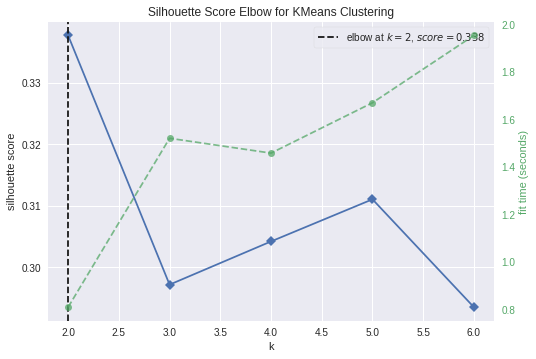

Optimal number of clusters: 2


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(df_dte_normalized)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

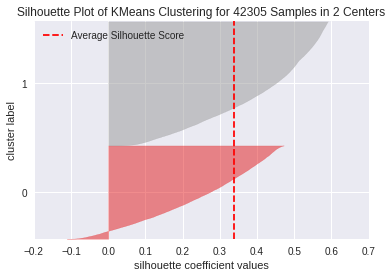

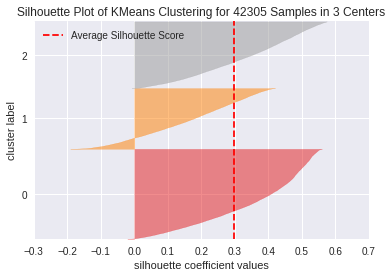

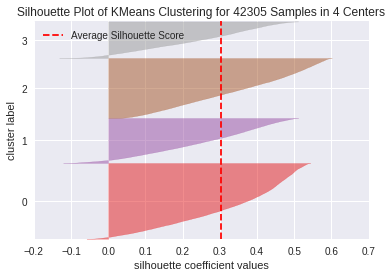

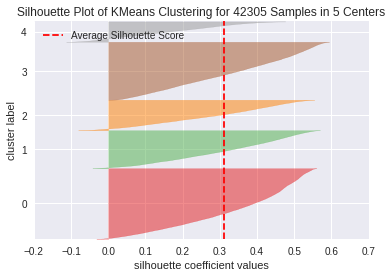

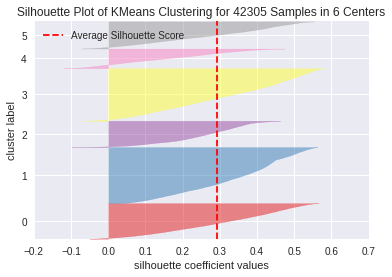

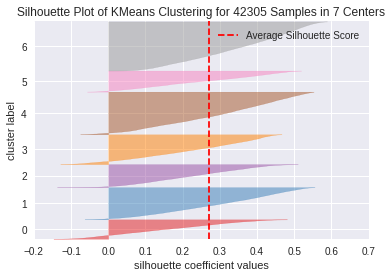

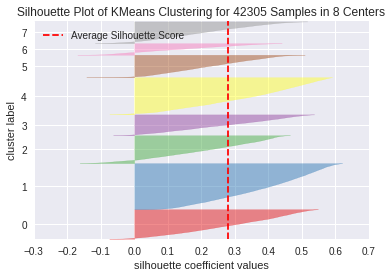

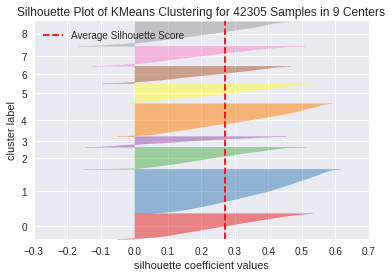

In [ ]:
for i in range(2, 10):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(df_dte_normalized)    
  sil_visualizer.show()

In [38]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_dte_normalized)

y_means = kmeans.predict(df_dte_normalized)

predicted = pd.DataFrame(y_means, columns=["cluster"])
predictions = pd.concat([df_dte, predicted ], axis=1)

predictions

danceability    tempo  energy  cluster
0             0.831  156.985   0.814        3
1             0.719  115.080   0.493        1
2             0.850  218.050   0.893        2
3             0.476  186.948   0.781        0
4             0.798  147.988   0.624        1
...             ...      ...     ...      ...
42300         0.528  150.013   0.693        4
42301         0.517  149.928   0.768        0
42302         0.361  154.935   0.821        0
42303         0.477  150.042   0.921        0
42304         0.529  155.047   0.945        0

[42305 rows x 4 columns]

<h3> Centroidi

In [39]:
centers = kmeans.cluster_centers_

centers_original = pd.DataFrame(centers, columns = colonne)

centers_original

danceability     tempo    energy
0      0.457940  0.587426  0.908253
1      0.790754  0.437960  0.554213
2      0.727751  0.776152  0.650990
3      0.707283  0.462365  0.860863
4      0.478196  0.555747  0.530676

In [40]:
df_dte = df_dte.iloc[:,:].values

Text(0.5, 0, 'Energy')

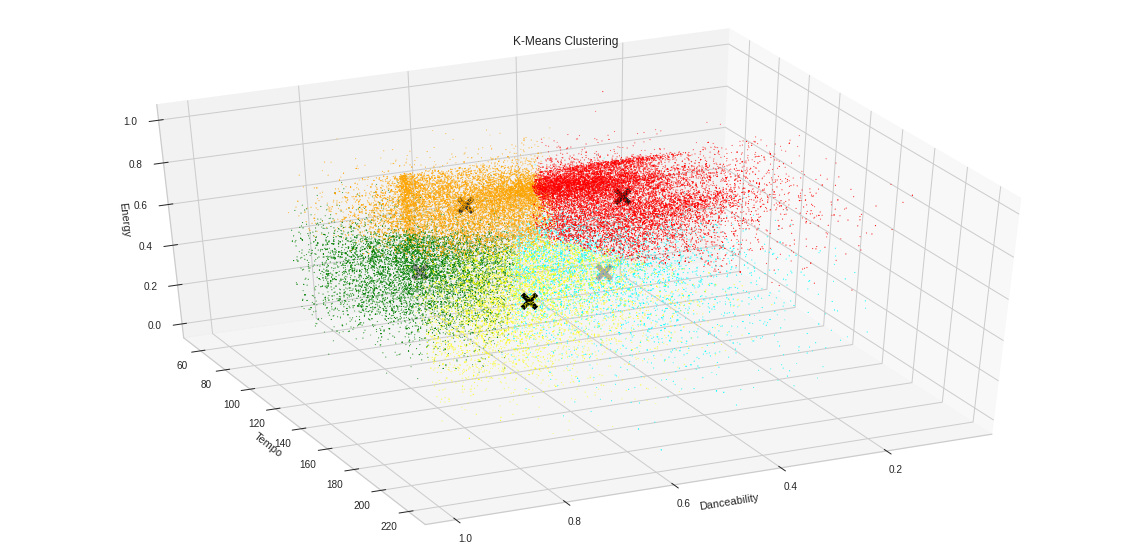

In [41]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 65)

x = np.array(y_means==0)
y = np.array(y_means==1)
z = np.array(y_means==2)
v = np.array(y_means==3)
w = np.array(y_means==4)


ax.scatter(df_dte[x][:, 0], df_dte[x][:, 1], df_dte[x][:, 2], s=0.7, color='red')
ax.scatter(df_dte[y][:, 0], df_dte[y][:, 1], df_dte[y][:, 2], s=0.7, color='green')
ax.scatter(df_dte[z][:, 0], df_dte[z][:, 1], df_dte[z][:, 2], s=0.7, color='yellow')
ax.scatter(df_dte[v][:, 0], df_dte[v][:, 1], df_dte[v][:, 2], s=0.7, color='orange')
ax.scatter(df_dte[w][:, 0], df_dte[w][:, 1], df_dte[w][:, 2], s=0.7, color='cyan')

centroids_rescaled = scaler.inverse_transform(centers_original)

ax.scatter(centroids_rescaled[:, 0], 
           centroids_rescaled[:, 1], 
           centroids_rescaled[:, 2], 
           marker='x', s=200, linewidth=5, color='black', zorder=30)

plt.title('K-Means Clustering')

ax.set_xlabel('Danceability')
ax.set_ylabel('Tempo')
ax.set_zlabel('Energy')

# Clustering bidimensionale

## Danceability - Tempo

In [ ]:
df_dt = df[['danceability','tempo']]

df_dt

danceability    tempo
0             0.831  156.985
1             0.719  115.080
2             0.850  218.050
3             0.476  186.948
4             0.798  147.988
...             ...      ...
42300         0.528  150.013
42301         0.517  149.928
42302         0.361  154.935
42303         0.477  150.042
42304         0.529  155.047

[42305 rows x 2 columns]

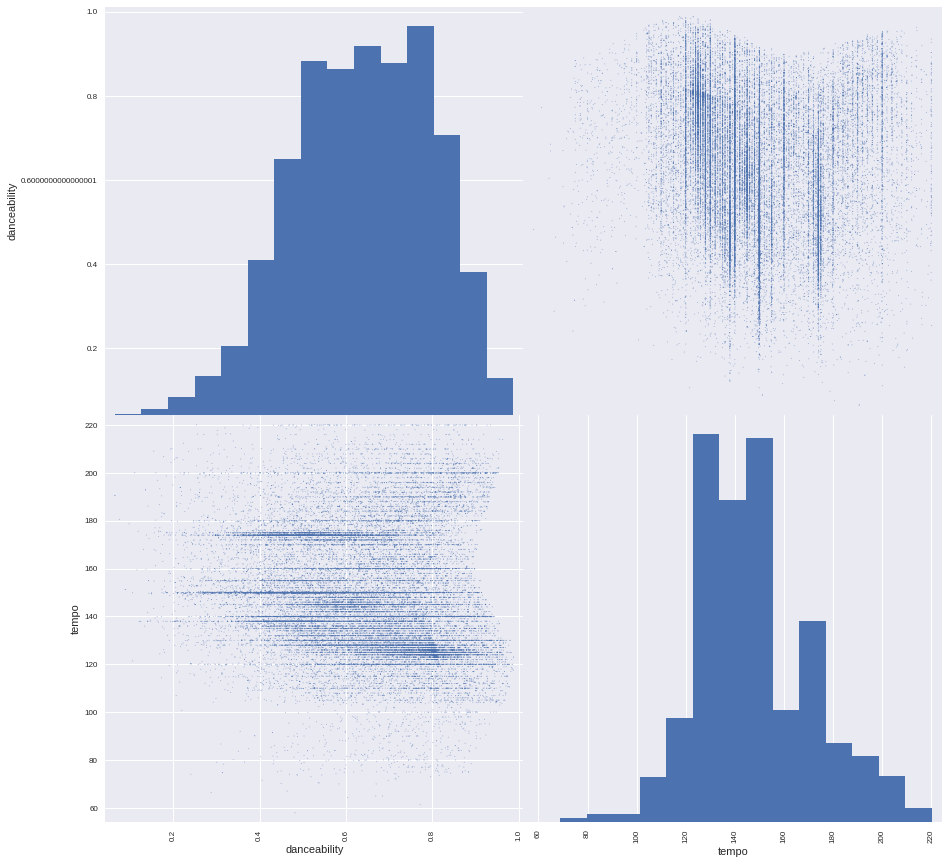

In [ ]:
scatter = pd.plotting.scatter_matrix(df_dt, marker = 'o', s=1, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

<h3> Normalizziamo

In [ ]:
# Normalizzazione
scaler = MinMaxScaler()
df_dt_normalized = scaler.fit_transform(df_dt)
df_dt_normalized

array([[0.82988406, 0.61000598],
       [0.70852747, 0.35184786],
       [0.85047134, 0.98620035],
       ...,
       [0.32061979, 0.59737684],
       [0.44631054, 0.56723323],
       [0.50265468, 0.59806682]])

### K-Means

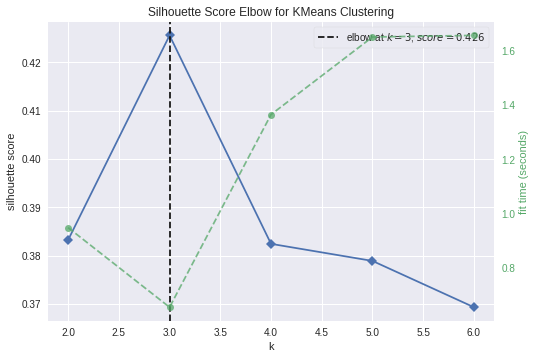

Optimal number of clusters: 3


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(df_dt_normalized)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

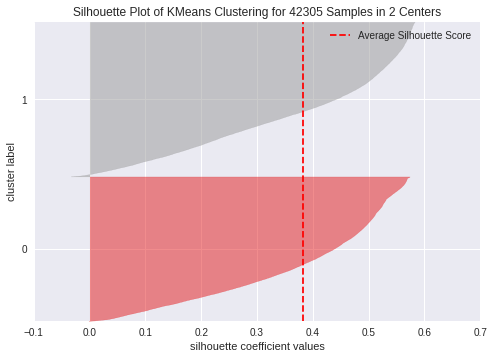

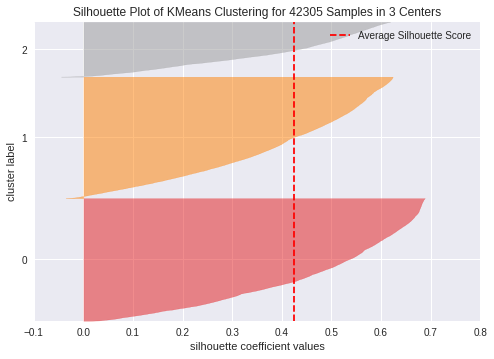

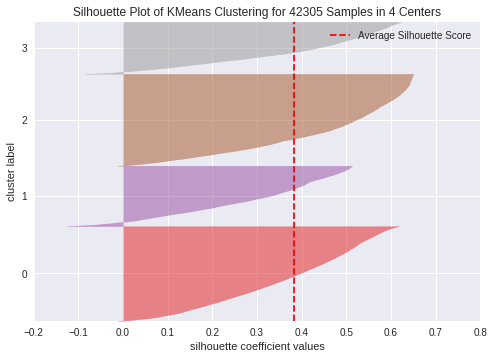

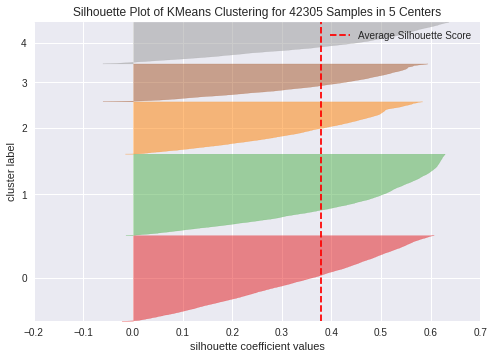

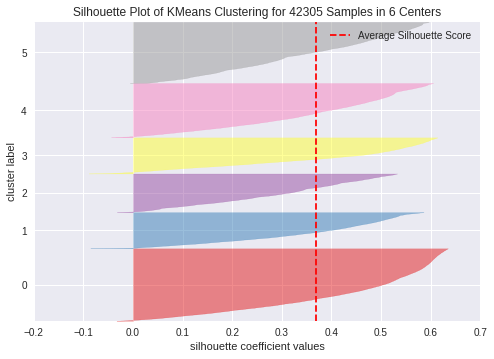

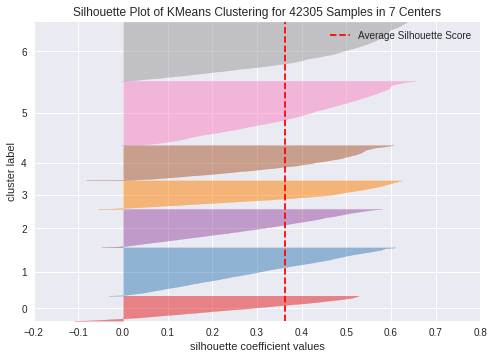

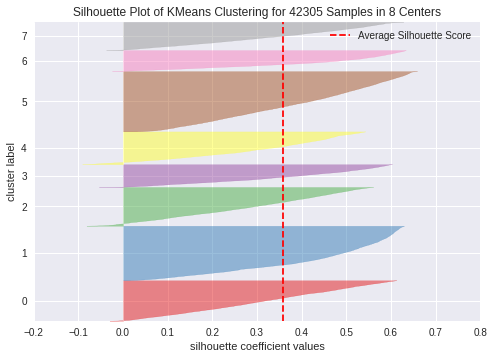

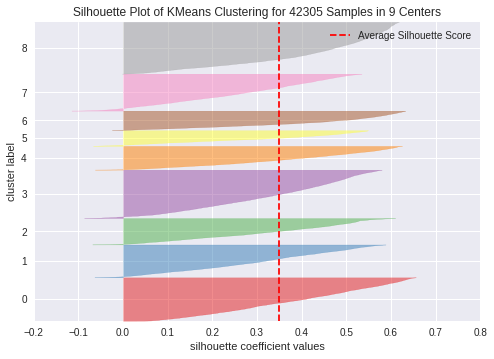

In [ ]:
for i in range(2, 10):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(df_dt_normalized)    
  sil_visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_dt_normalized)

y_means = kmeans.predict(df_dt_normalized)

predicted = pd.DataFrame(y_means, columns=["cluster"])
predictions = pd.concat([df_dt, predicted ], axis=1)

predictions

danceability    tempo  cluster
0             0.831  156.985        2
1             0.719  115.080        2
2             0.850  218.050        3
3             0.476  186.948        1
4             0.798  147.988        2
...             ...      ...      ...
42300         0.528  150.013        0
42301         0.517  149.928        0
42302         0.361  154.935        1
42303         0.477  150.042        1
42304         0.529  155.047        1

[42305 rows x 3 columns]

In [ ]:
df_dt_numpy = df_dt.iloc[:,:].values

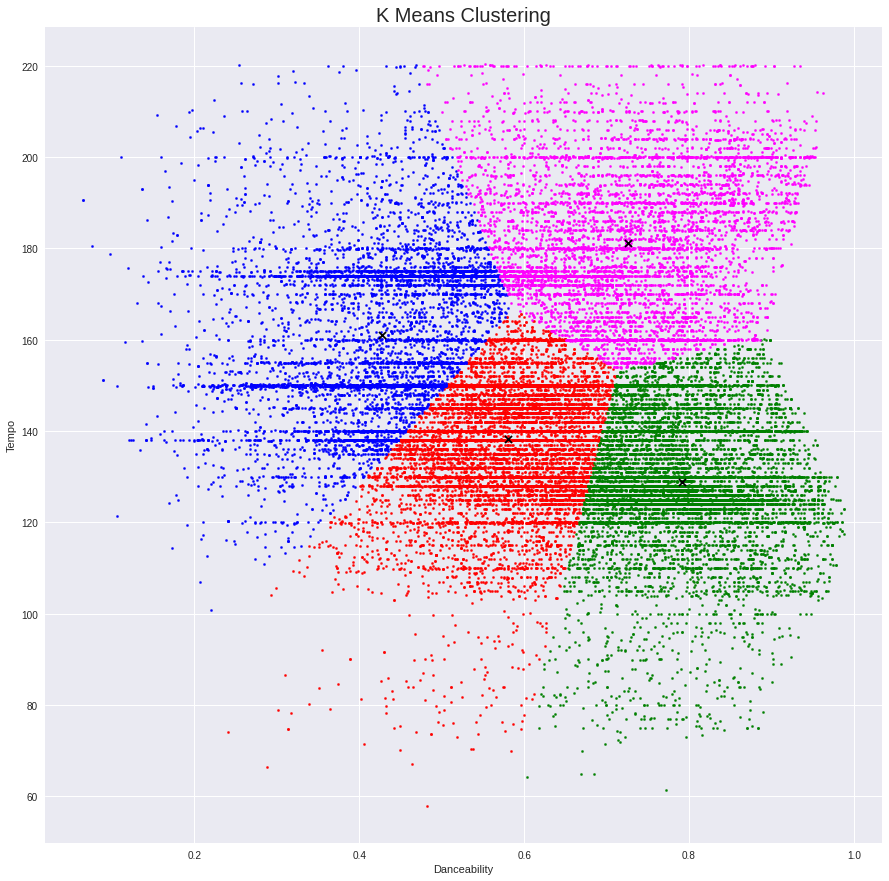

In [ ]:
# plot dei vari cluster
plt.figure(figsize=(15,15))

# qui sto vedendo quelli che guadagnano poco e spendono molto
plt.scatter(df_dt_numpy[y_means == 0, 0], df_dt_numpy[y_means == 0, 1], s = 5, c = 'red')
plt.scatter(df_dt_numpy[y_means == 1, 0], df_dt_numpy[y_means == 1, 1], s = 5, c = 'blue')
plt.scatter(df_dt_numpy[y_means == 2, 0], df_dt_numpy[y_means == 2, 1], s = 5, c = 'green')
plt.scatter(df_dt_numpy[y_means == 3, 0], df_dt_numpy[y_means == 3, 1], s = 5, c = 'magenta')

# centroidi
centroids_rescaled = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(centroids_rescaled[:, 0], 
           centroids_rescaled[:, 1], 
           marker='x', s=50, linewidths=10, color='black', zorder=50)

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.legend()
plt.show()

### DBSCAN

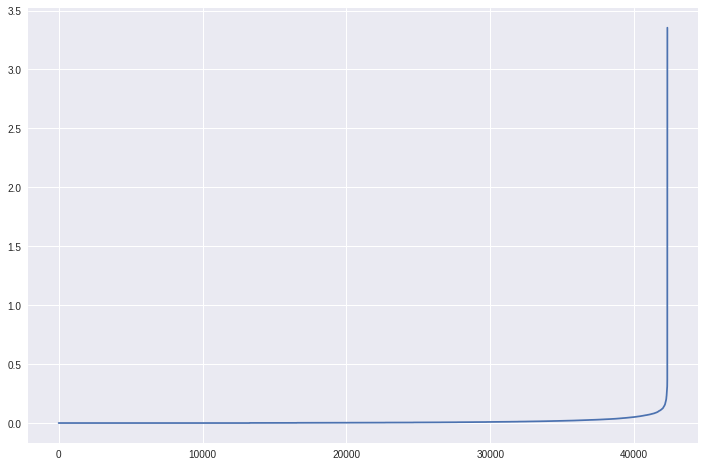

In [ ]:
neigh = NearestNeighbors(n_neighbors=300)
nbrs = neigh.fit(df_dt)
distances, indices = nbrs.kneighbors(df_dt)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=300,metric='euclidean')
model=dbscan.fit(df_dt)
labels=model.labels_
Counter(labels)

Counter({-1: 12286,
         0: 610,
         1: 1446,
         2: 1623,
         3: 531,
         10: 1439,
         4: 4652,
         5: 2496,
         6: 1402,
         7: 1012,
         8: 964,
         15: 522,
         9: 1633,
         27: 326,
         11: 563,
         12: 1945,
         24: 542,
         13: 608,
         14: 682,
         16: 732,
         17: 1053,
         18: 558,
         23: 426,
         19: 437,
         20: 460,
         21: 423,
         22: 626,
         26: 444,
         25: 1114,
         28: 750})

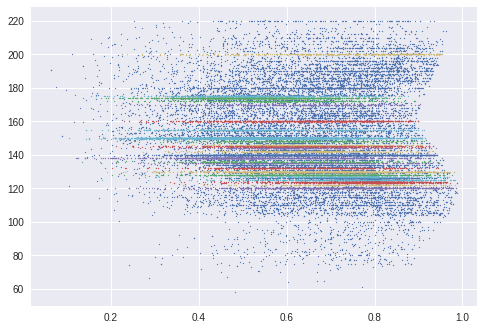

In [ ]:
#plotting the results:
u_labels = np.unique(labels)
for i in u_labels:

    plt.scatter(df_dt_numpy[labels == i , 0] , df_dt_numpy[labels == i , 1] , label = i, s=1)

#plt.legend()

plt.show()

## Tempo - Energy

In [ ]:
df_te = df[['tempo','energy']]

df_te

tempo  energy
0      156.985   0.814
1      115.080   0.493
2      218.050   0.893
3      186.948   0.781
4      147.988   0.624
...        ...     ...
42300  150.013   0.693
42301  149.928   0.768
42302  154.935   0.821
42303  150.042   0.921
42304  155.047   0.945

[42305 rows x 2 columns]

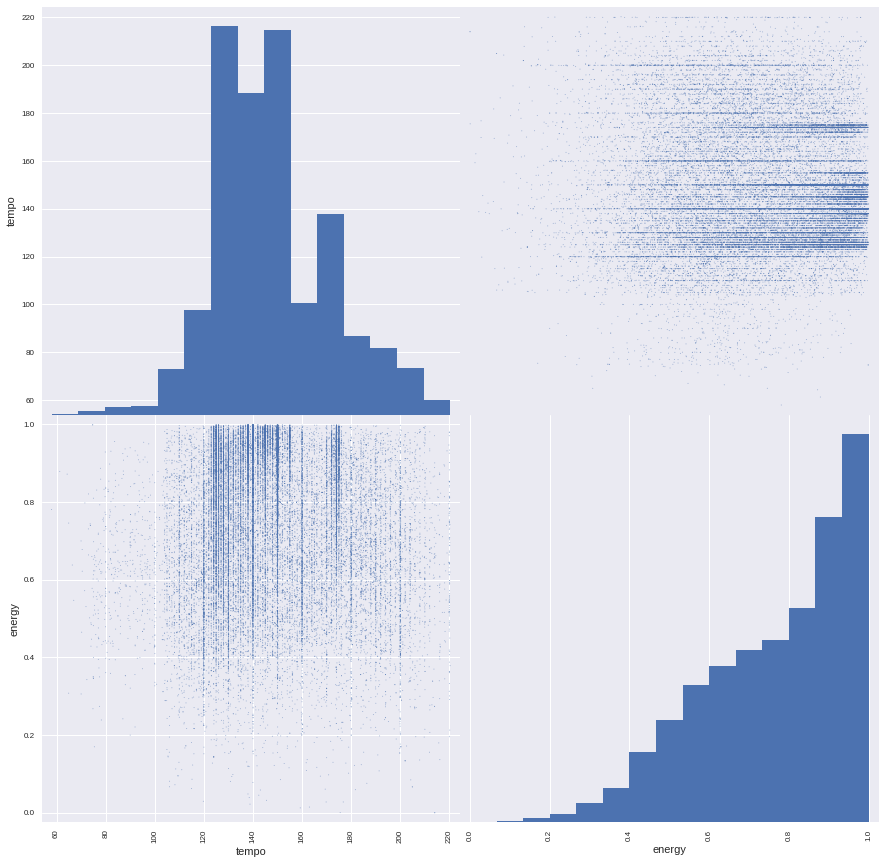

In [ ]:
scatter = pd.plotting.scatter_matrix(df_te, marker = 'o', s=1, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

<h3> Normalizziamo

In [ ]:
# Normalizzazione
scaler = MinMaxScaler()
df_te_normalized = scaler.fit_transform(df_te)
df_te_normalized

array([[0.61000598, 0.81395479],
       [0.35184786, 0.49287677],
       [0.98620035, 0.89297399],
       ...,
       [0.59737684, 0.82095649],
       [0.56723323, 0.9209808 ],
       [0.59806682, 0.94498663]])

### K-Means

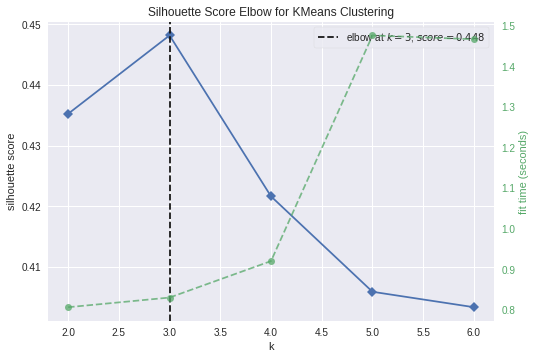

Optimal number of clusters: 3


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(df_te_normalized)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

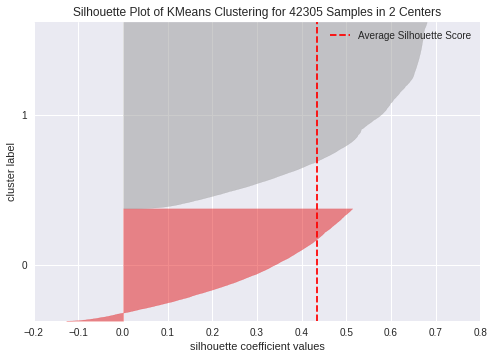

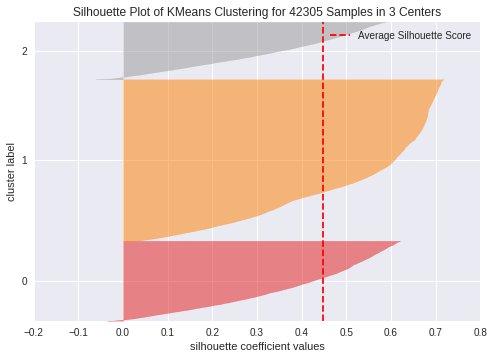

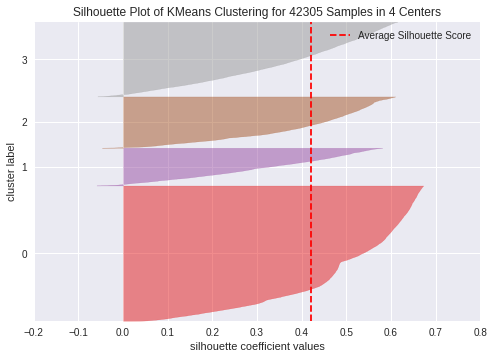

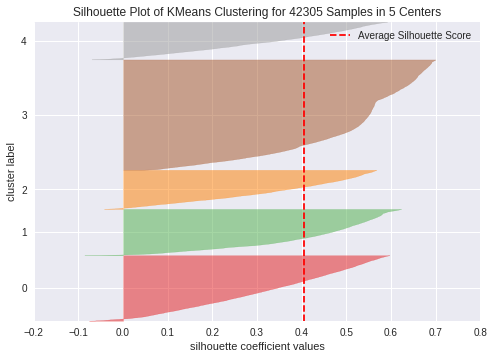

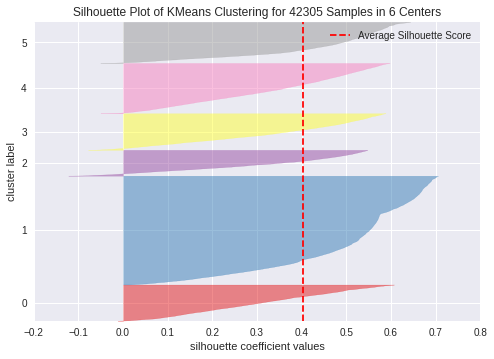

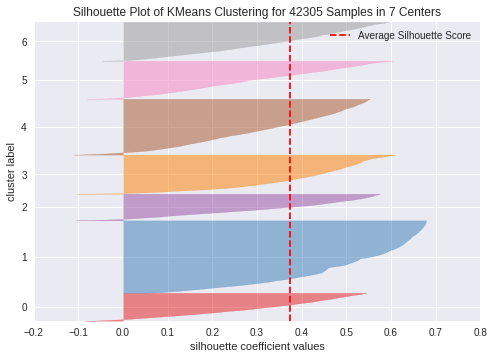

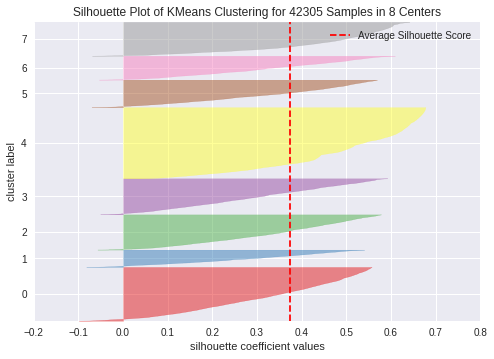

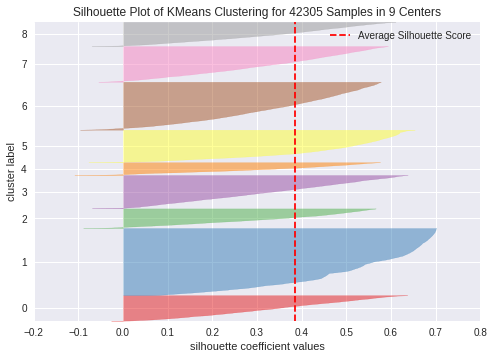

In [ ]:
for i in range(2, 10):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(df_te_normalized)    
  sil_visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_te_normalized)

y_means = kmeans.fit_predict(df_te_normalized)

predicted = pd.DataFrame(y_means, columns=["cluster"])
predictions = pd.concat([df_te, predicted ], axis=1)

predictions

tempo  energy  cluster
0      156.985   0.814        2
1      115.080   0.493        3
2      218.050   0.893        2
3      186.948   0.781        2
4      147.988   0.624        3
...        ...     ...      ...
42300  150.013   0.693        3
42301  149.928   0.768        0
42302  154.935   0.821        0
42303  150.042   0.921        0
42304  155.047   0.945        0

[42305 rows x 3 columns]

In [ ]:
df_te_numpy = df_te.iloc[:,:].values

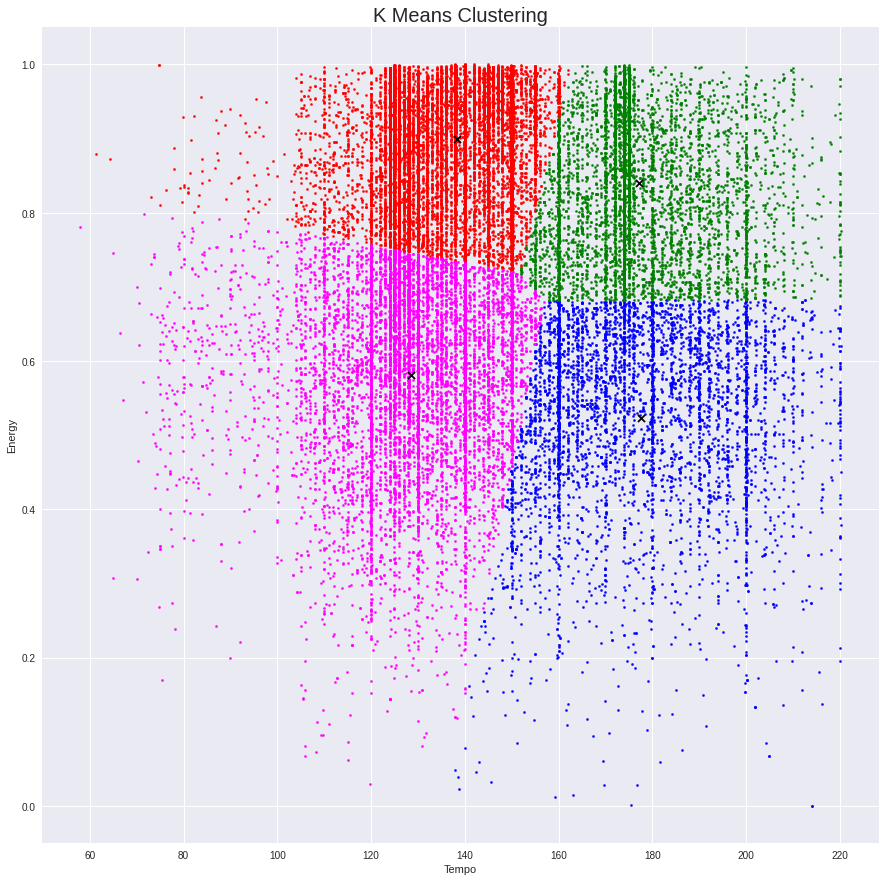

In [ ]:
# plot dei vari cluster
plt.figure(figsize=(15,15))

# qui sto vedendo quelli che guadagnano poco e spendono molto
plt.scatter(df_te_numpy[y_means == 0, 0], df_te_numpy[y_means == 0, 1], s = 5, c = 'red')
plt.scatter(df_te_numpy[y_means == 1, 0], df_te_numpy[y_means == 1, 1], s = 5, c = 'blue')
plt.scatter(df_te_numpy[y_means == 2, 0], df_te_numpy[y_means == 2, 1], s = 5, c = 'green')
plt.scatter(df_te_numpy[y_means == 3, 0], df_te_numpy[y_means == 3, 1], s = 5, c = 'magenta')
plt.scatter(df_te_numpy[y_means == 4, 0], df_te_numpy[y_means == 4, 1], s = 5, c = 'orange')


# centroidi
centroids_rescaled = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(centroids_rescaled[:, 0], 
           centroids_rescaled[:, 1], 
           marker='x', s=50, linewidths=10, color='black', zorder=50)


plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.legend()
plt.show()

### DBSCAN

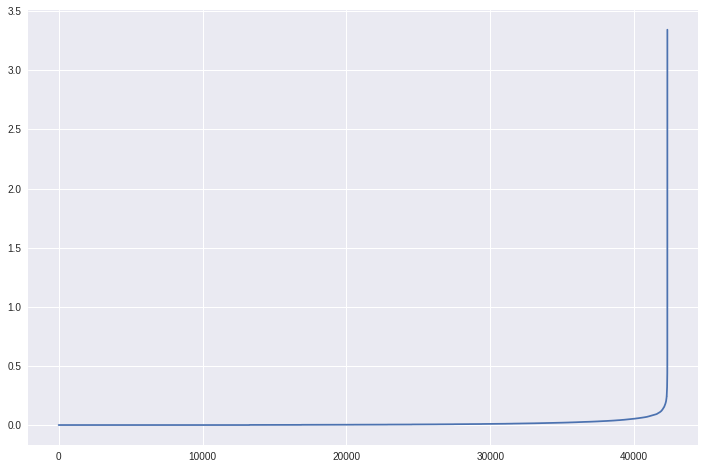

In [ ]:
neigh = NearestNeighbors(n_neighbors=300)
nbrs = neigh.fit(df_te)
distances, indices = nbrs.kneighbors(df_te)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=300,metric='euclidean')
model=dbscan.fit(df_te)
labels=model.labels_
Counter(labels)

Counter({-1: 12748,
         0: 596,
         1: 1437,
         2: 1613,
         10: 539,
         9: 1440,
         3: 4650,
         4: 2497,
         5: 1404,
         6: 1014,
         7: 960,
         8: 1633,
         11: 566,
         12: 1943,
         21: 603,
         13: 679,
         14: 511,
         15: 722,
         16: 533,
         17: 1053,
         18: 553,
         19: 413,
         20: 427,
         22: 453,
         24: 412,
         23: 624,
         26: 426,
         25: 1116,
         27: 740})

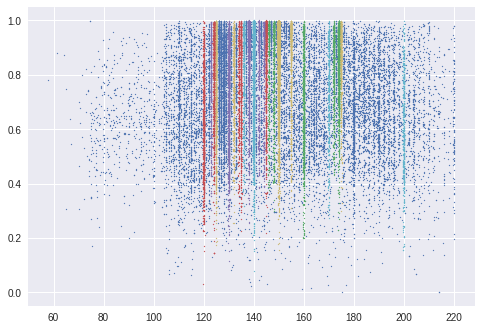

In [ ]:
#plotting the results:
u_labels = np.unique(labels)
for i in u_labels:

    plt.scatter(df_te_numpy[labels == i , 0] , df_te_numpy[labels == i , 1] , label = i, s=1)

#plt.legend()

plt.show()